# Introduction

The paper [1] proposes a framework to rigorously define the organization of cellular structures based on RNA abundance, based on the hypothesis that there is a strong correlation between cell organization and gene expression (which can be characterized by the number of RNA transcripts in key genes of the cell). Due to well-documented gene expression transitions as well as stereotypical structural changes during differentiation that can be captured by imaging, hiPSC-derived cardiomyocytes were chosen as the cell model type for testing. However, the dominant conclusion to be drawn from the paper is that the classification of the state of cellular organization should not be based on gene expression alone.



## Assesement of reproducibility proccess

The following assessment is reported based on the 15 hour timeframe (approximately).  

1. $\textbf{Data accesibility} \newline$
The data used in the experiments of the paper are easily accessible. In addition, the code provided by the authors gives a very clear intuition on which specific dataset is required regarding the reproducibility of the paper results [3].$\newline$

1. $\textbf{Ability to handle dataset's complexity} \newline$
I would suggest that the raw data used by the paper falls into the higher end of the complexity spectrum. However, the authors propose a very efficient framework that provides the ability to classify and quantify the myofibril organization based on the alpha-actinin-2 patterns. The preprocessed data is easier to work with and positively affects the ability to analytically replicate the paper results.$\newline$

1. $\textbf{Workflow presentation} \newline$
The paper records and presents the proposed frameworks in an evolutionary manner. This approach gives a better intuition regarding the used methods. The plethora of figures corresponding to each experimental process that also contain explicit subfigures that describe the individual stages of each experimental workflow, adds transparency to the whole process. Even with a limited background in biology, it is my understanding that the reader is able to get an intuition regarding the methods mentioned in the paper, without completely understanding the subtle biological mechanisms and motivations. $\newline$

1. $\textbf{Necessary Background} \newline$
I would characterize the paper as very self-explanatory. As mentioned before, even with a minimum biology background the reader is able to understand the basic motivations behind the proposed methods, mainly due to the very analytical and informative figures as well as due to the general structure of the paper. Personally, (from a computer science standpoint) I was able to get a very good intuition regarding the biological motivations with nothing more than simple web searches regarding specific biology terms that were unknown to me. However, in order for someone to get an in detail understanding of the paper, an adequate biology background is definitely required. In addition, regarding the data-analysis part of the paper, I did not face any particular issues in terms of understanding. The paper clearly explains all the applied methods (deep learning, computer vision). However, as it is the case with the majority of research papers, some questions based on either paper's ommissions or my understanding, arose. For instance, the reason behind the decrease in the number of cells at different timepoints as illustrated in Figure 2F is not yet clear to me. $\newline$

In general, as far as the time distribution is concerned, I personally needed more time to familiarize myself with the special biology terms, in order to make sense of the information provided by the figures, than to reproduce the plots. The pie chart below offers a better illustration of the percentage of time distributed for each task. 

The rest of the notebook contains the code as provided by [2] as well as the majority of the paper's figures. For most of the figures, I have added a number of comments in addition to the authors' comments in order to demonstrate my level of understanding for each one of them. I have also included figures from the suplementary material of the paper as they were provided by the authors' code, however, no comments have been added for those. 

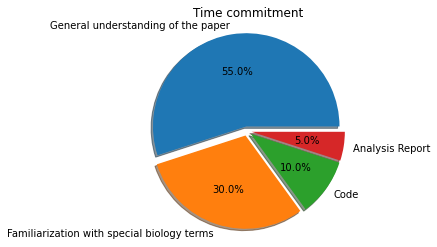

In [14]:
import numpy as np
import matplotlib.pyplot as plt
# if using a Jupyter notebook, include:
%matplotlib inline

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['General understanding of the paper', 'Familiarization with special biology terms', 'Code','Analysis Report']
sizes = [55, 30, 10, 5]
explode = (0.05, 0.05, 0.05, 0.05)

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, explode=explode, autopct='%1.1f%%', shadow=True)
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax.set_title('Time commitment')


plt.show()

1. [Paper](https://www.sciencedirect.com/science/article/pii/S2405471221001563)

1. [Paper Notebooks](https://github.com/AllenCellModeling/fish_morphology_manuscript_notebooks/blob/master/notebooks/20201124_manuscript_figures.ipynb)

1. [Available Datasets](https://www.allencell.org/cell-catalog.html)

In [ ]:
# Manuscript plots with filtered data
- using `gfp_keep` column to filter gfp/structure negative cells prior to plotting
- LIVE: flag cells with alpha-actinin protein density (μm^2) <= 75000
- FISH: flag cells with manual score of 0 (either kg/mh scores for original FISH or no_structure == 0 for other FISH)

In [2]:


from pathlib import Path

import numpy as np
import pandas as pd
import pingouin as pg
from scipy.stats import spearmanr
from sklearn.metrics import confusion_matrix
import sys
sys.path.append('/Users/christoszangos/fish_morphology_code/fish_morphology_code')
#from fish_morphology_code import*
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import quilt3
#from fish_morphology_code.analysis.notebook_utils import (
from analysis.notebook_utilscopy import (
    DAY_18_COLOR,
    DAY_32_COLOR,
    DAY_COLOR_PALETTE,
    DAY_COLOR_PALETTE_THREE,
    BAR_PLOT_COLUMNS,
    SHORT_FEAT_NAME_MAP,
    BAR_PLOT_COLUMNS_SHORT,
    PROBE_ORDER,
    CI_EXTENT,
    FEATURE_TYPE_MAP,
    safe,
    get_regression_coef,
    boot_regression,
    ci_low,
    ci_high,
    make_reg_plot_ci_df,
    make_regression_bar_plot,
    get_pred_true,
    make_regression_scatter_plot,
    boot_spearmanr,
)

from matplotlib import cm
#import fish_morphology_code.analysis.plots
import analysis.plotscopy
from sklearn.metrics import confusion_matrix

### Load collated data from quilt

In [4]:
#p_manuscript_data = quilt3.Package.browse(
#        "tanyasg/revised_manuscript_plots", "s3://allencell-internal-quilt"
#)

# public package
p_manuscript_data = quilt3.Package.browse(
        "aics/integrated_transcriptomics_structural_organization_hipsc_cm", "s3://allencell"
)

Loading manifest: 100%|█████████████████████| 63309/63309 [00:01<00:00, 48.9k/s]


In [3]:
p_manuscript_data

(remote Package)
 └─2d_autocontrasted_fields_and_single_cells_fish_1/
 └─2d_autocontrasted_fields_and_single_cells_fish_2/
 └─2d_autocontrasted_fields_and_single_cells_fish_3/
 └─2d_autocontrasted_fields_and_single_cells_fish_4/
 └─2d_autocontrasted_single_cell_features_fish_1/
 └─2d_autocontrasted_single_cell_features_fish_2/
 └─2d_autocontrasted_single_cell_features_fish_3/
 └─2d_autocontrasted_single_cell_features_fish_4/
 └─2d_nuclear_masks/
 └─2d_segmented_fields_fish_1/
 └─2d_segmented_fields_fish_2/
 └─2d_segmented_fields_fish_3/
 └─2d_segmented_fields_fish_4/
 └─3d_actn2_segmentation/
 └─README.md
 └─actn2_pattern_ml_classifier_model/
 └─actn2_pattern_ml_classifier_train/
 └─automated_local_and_global_structure_fish_1/
 └─automated_local_and_global_structure_fish_2/
 └─automated_local_and_global_structure_fish_3/
 ...

In [5]:
p_manuscript_data["revised_manuscript_plots"].fetch(
    "figure_data"
)

Copying objects: 100%|██████████████████████| 16.1M/16.1M [00:19<00:00, 806kB/s]


(local Package)
 └─README.md
 └─data.csv

In [6]:
SAVE=True

if SAVE:
    SAVE_DIR = Path("./plots")
    SAVE_DIR.mkdir(parents=True, exist_ok=True)

    save_dir_pngs = SAVE_DIR/"pngs"
    save_dir_svgs = SAVE_DIR/"svgs"
    save_dir_pngs.mkdir(parents=True, exist_ok=True)
    save_dir_svgs.mkdir(parents=True, exist_ok=True)

In [7]:
replate_groups = {
    "2019-05-17": 1,
    "2019-05-21": 2,
    "2019-05-24": 3,
    "2019-06-04": 4,
    "2020-06-07": 5,
    "2020-08-28": 6,
    "2020-09-08": 7
}

#### Load collated data

In [8]:
#df = pd.read_csv("../20201110_collate_revised_data/20201124_revised_plot_data.csv")
df = pd.read_csv("figure_data/data.csv")

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (1,5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Add replate groups

In [9]:
df["replate_group"] = [replate_groups[x] for x in df.replate_date]

### Filter out gfp negative scores
- using `gfp_keep` column
- fish are filtered based on manual score of 0; meaning no gfp/structure visible
- live are filtered based on protein density threshold of 75000 (after converting to micrometers squared)

In [10]:
df = df[df.gfp_keep].copy().reset_index(drop=True)

### Figure 2F Heatmap of fraction area per class, cells sorted by fraction area of organized z-disc


Heatmaps from three time points in which individual cells (x axis) have been ranked according to the fraction of the cell area consisting of organized z-disks (yellow). Colors within the heatmap represent the same organizational classes ($\textit{Organized z-disks}$, $\textit{Organized puncta}$, $\textit{Disorganized puncta
Fibers}$, $\textit{Diffuse/other}$, $\textit{Background}$)

1. n = 6,193 cells (D18)
1. n = 1,806 cells (D25)
1. n = 4,942 cells (D32)


We can observe that there is an increased number of cells with regular z-disk patterns (increased myofibril organization over time) at later time points which is expected since cells tend to be more organised as they mature and start to differantiate. 


In [11]:
feat_cols = [
    "Cell area (μm^2)",
    "Cell aspect ratio",
    "Fraction cell area background",
    "Fraction cell area diffuse/other",
    "Fraction cell area fibers",
    "Fraction cell area disorganized puncta",
    "Fraction cell area organized puncta",
    "Fraction cell area organized z-disks",
    "Max coefficient var",
    "Peak height",
    "Peak distance (μm)",
    "Cell age"
]

In [12]:
yvars_set1 = [
    "Fraction cell area background",
    "Fraction cell area diffuse/other",
    "Fraction cell area disorganized puncta",
    "Fraction cell area fibers",
    "Fraction cell area organized puncta",
    "Fraction cell area organized z-disks"
]

viridis = cm.get_cmap('viridis', len(yvars_set1))

(6193, 66)
(1806, 66)
(4942, 66)


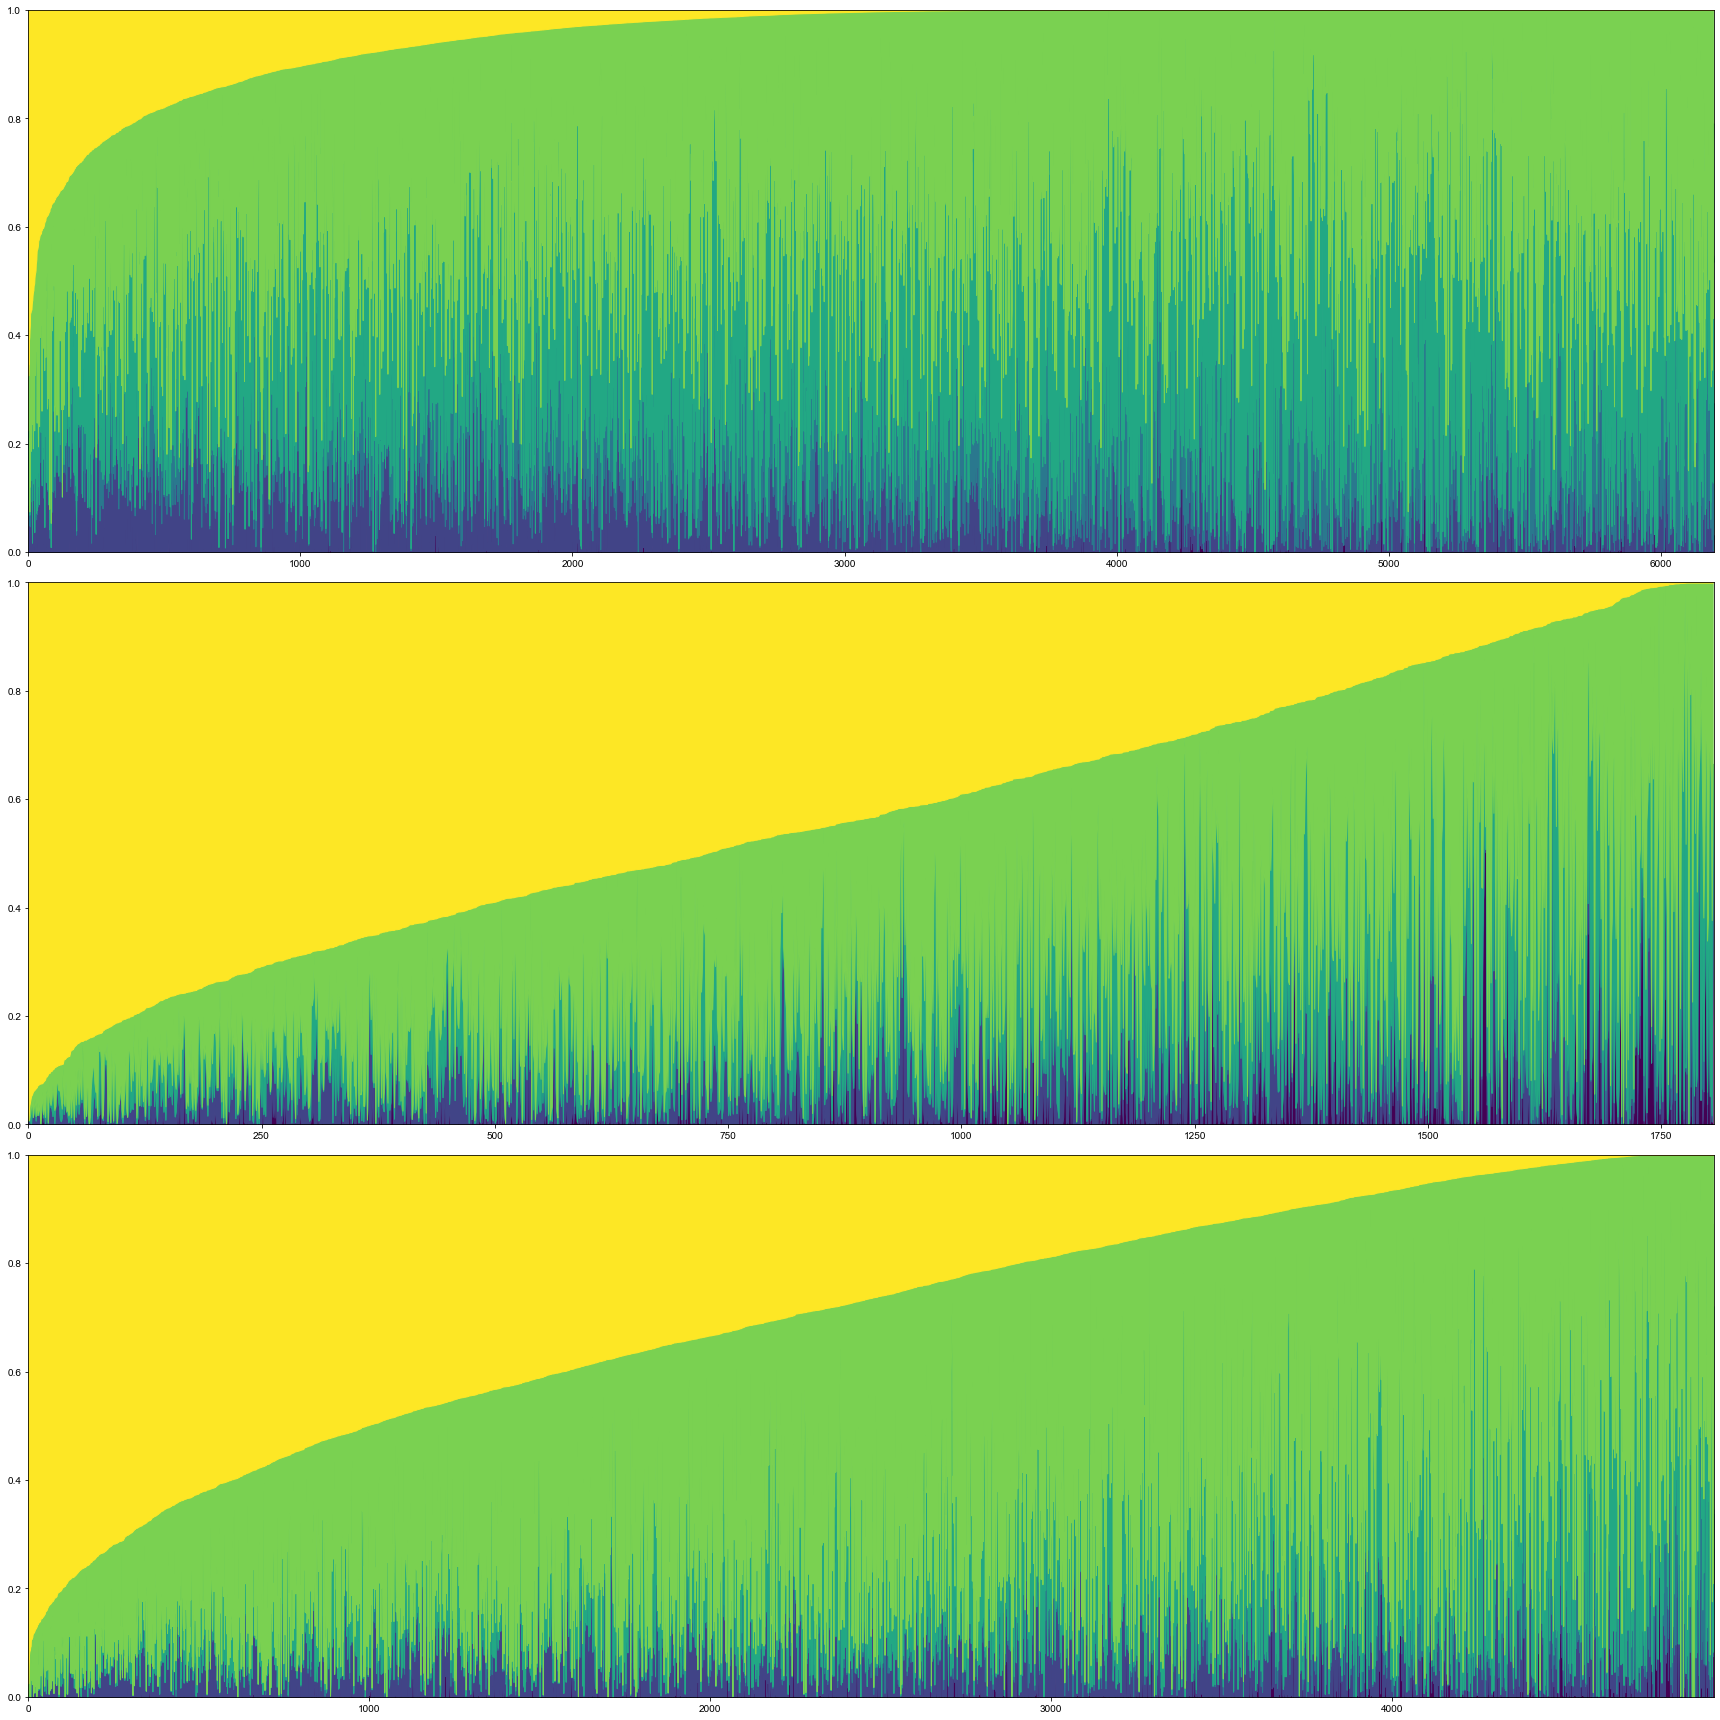

In [13]:
ranking_variable = 'Fraction cell area organized z-disks'
    
fig, ax = plt.subplots(3,1, figsize=(24,24))
for id_age, (age, df_age) in enumerate(df[df.Type=="FISH"].groupby("Cell age")):
    df_age = df_age.sort_values(ranking_variable, ascending=False)
    print(df_age.shape)

    x = np.arange(df_age.shape[0])
    y = np.zeros(x.shape, dtype = np.float32)

    ax[id_age].set_ylim(0,1)
    ax[id_age].set_xlim(0,x.size)

    for id_yvar, yvar in enumerate(yvars_set1):
        y_sup = y + df_age[yvar].values
        ax[id_age].fill_between(x[:],y1=y,y2=y_sup, color=viridis(id_yvar/len(yvars_set1)))
        y = y_sup
        
plt.tight_layout()
if SAVE:
    plt.savefig(f'heatmap_rankby_{ranking_variable}.png')
    plt.savefig(save_dir_pngs/f'fig_2f_heatmap_rankby_{ranking_variable}.png', dpi=300, bbox_inches = "tight")
    plt.savefig(save_dir_svgs/f'fig_2f_heatmap_rankby_{ranking_variable}.svg', format="svg", bbox_inches = "tight")
plt.show()

### Figure 3E Max coefficient of variation vs. Fraction of cell organized z-disk
Plot old and new/bonus fish -> plate -013, -014, -171, -172

Now we need to quantify the large-scale alignment of myofibrils since it provides insights into the overall structural organization of cardiomyocytes.

Plot showing fraction of cell area covered with organized z-disks versus maximum coefficient of variation from Haralick correlation method at D18 (blue) and D32 (pink). Cells can be separated as being regularly aligned but containing few regular stripes or as having high proportions of regular structure and being well aligned. n = 11,135 cells.

In [18]:
df[df.Dataset.isin(["OldFish", "NewFish"])].shape

(11135, 66)

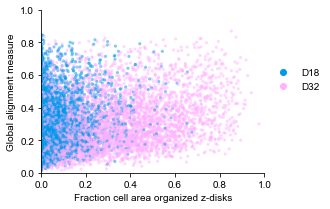

In [17]:
plt.figure(figsize=(4, 3))

plot_org_vs_stripes = sns.scatterplot(
    data=df[df.Dataset.isin(["OldFish", "NewFish"])].sample(frac=1, replace=False).reset_index(drop=True),
    x="Fraction cell area organized z-disks",
    y="Max coefficient var",
    hue="Cell age",
    hue_order=[18, 32],
    palette=DAY_COLOR_PALETTE,
    linewidth=0,
    alpha = 0.5,
    s=10,
)
plot_org_vs_stripes.set(ylabel="Global alignment measure");
plot_org_vs_stripes.set(xlim=(0, 1));
plot_org_vs_stripes.set(ylim=(0, 1));

handles, _ = plot_org_vs_stripes.get_legend_handles_labels()
plot_org_vs_stripes.legend(handles, ["D18", "D32"], bbox_to_anchor=(1.0, 0.7), frameon=False)
sns.despine()

# save png and svg
if SAVE:
    plt.savefig(save_dir_pngs/'fig_3g_regular_stripes_vs_global_alignment.png', dpi=300, bbox_inches = "tight")
    plt.savefig(save_dir_svgs/'fig_3g_regular_stripes_vs_global_alignment.svg', format="svg", bbox_inches = "tight")

#### Old Fish cells with manual scores used for regression model

In [15]:
df_old = df[df.Dataset=="OldFish"].copy()

all_good_scores = (df_old.kg_structure_org_score > 0) & (df_old.mh_structure_org_score > 0)
df_old = df_old[all_good_scores]
df_old.shape

(4823, 66)

### Figure 4B Cos regression coefficients bar graph

For the third and final part of the classification process of the stages of myofibrillar organization the paper proposes a framework for calculating the combined organizations score that will serve as a measure of the level of organization of the cells based on the experts manual annotation scores. 

A linear regression model fits the expert scores as a function of the 11 features. The figure below shows the relative contribution of each feature to the regression model. The linear model with regression coefficients for the 11 features was applied to the full dataset to calculate the combined organizational cost (COS), which is a continuous value, for all single cells.

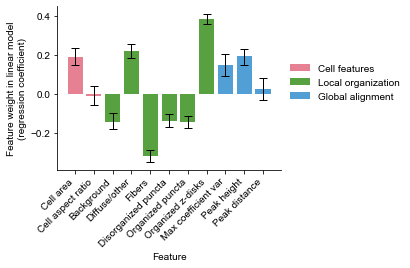

In [16]:
df_boot_reg = boot_regression(
    df_old,
    N=1000,
    X_cols=BAR_PLOT_COLUMNS,
    y_col="Expert structural annotation score (mean)",
    weight_col="Expert structural annotation score (mean)",
)

reg_plot_ci_df = make_reg_plot_ci_df(df_boot_reg)

fig_bar, ax_bar = make_regression_bar_plot(reg_plot_ci_df, title="")

# save png and svg
if SAVE:
    plt.savefig(save_dir_pngs/'fig_4b_linear_model_feature_importances.png', dpi=300, bbox_inches = "tight")
    plt.savefig(save_dir_svgs/'fig_4b_linear_model_feature_importances.svg', format="svg", bbox_inches = "tight")


Save feature weights for Supplemental Table 4

In [17]:
#reg_plot_ci_df.to_csv("regression_feature_weights_20201207.csv", index=False)

### Figure 4C expert (both) vs. COS confusion matrices

In [18]:
df_expert = df[
    (df.kg_structure_org_score > 0) & (df.mh_structure_org_score > 0)
]

df_expert['Combined organizational score (rounded)'] = np.round(np.clip(df_expert['Combined organizational score'], 1,5))

df_expert_melt = df_expert.melt(
    value_vars=["kg_structure_org_score", "mh_structure_org_score"],
    id_vars=[c for c in df_expert.columns if c not in ["kg_structure_org_score", "mh_structure_org_score"]],
    var_name="Expert annotator",
    value_name="Expert score"
)
df_expert_melt["Expert annotator"] = df_expert_melt["Expert annotator"].apply(lambda x: x.split("_")[0])
df_expert_melt["Expert score"].unique()

assert np.all(sorted(df_expert_melt["Expert score"].unique()) == np.array([1,2,3,4,5]))
assert np.all(sorted(df_expert["kg_structure_org_score"].unique()) == np.array([1,2,3,4,5]))
assert np.all(sorted(df_expert["mh_structure_org_score"].unique()) == np.array([1,2,3,4,5]))

/var/folders/57/fdjppnf50nv2j54_fc_5kcr00000gn/T/ipykernel_3063/196605308.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_expert['Combined organizational score (rounded)'] = np.round(np.clip(df_expert['Combined organizational score'], 1,5))


### Get spearman correlations
Illustration of confusion matices w/ both exprt scores vs. combined organizational score

In [19]:
df_corrs_exp_both_cos = df_expert_melt.groupby(
    "Dataset"
)[
    [
        "Expert score",
        'Combined organizational score'
    ]
].corr(method="spearman").drop(
    columns=['Expert score']
).rename_axis(
    ['Dataset', 'column']
).drop(
    "Combined organizational score",
    level='column'
).reset_index(
).drop(
    columns="column"
).rename(columns={"Combined organizational score":"Expert-COS correlation (both)"})

df_corrs_exp_mean_cos = df_expert.groupby(
    "Dataset"
)[
    [
        "Expert structural annotation score (mean)",
        'Combined organizational score'
    ]
].corr(method="spearman").drop(
    columns=['Expert structural annotation score (mean)']
).rename_axis(
    ['Dataset', 'column']
).drop(
    "Combined organizational score",
    level='column'
).reset_index(
).drop(
    columns="column"
).rename(columns={"Combined organizational score":"Expert-COS correlation (mean)"})

df_corrs_exp_exp = df_expert.groupby(
    "Dataset"
)[
    [
        "kg_structure_org_score",
        "mh_structure_org_score"
    ]
].corr(method="spearman").drop(
    columns=['kg_structure_org_score']
).rename_axis(
    ['Dataset', 'column']
).drop(
    "mh_structure_org_score",
    level='column'
).reset_index(
).drop(
    columns="column"
).rename(columns={"mh_structure_org_score":"Expert-Expert correlation"})

df_score_corrs = df_corrs_exp_exp.merge(df_corrs_exp_mean_cos).merge(df_corrs_exp_both_cos)
df_score_corrs

Dataset  Expert-Expert correlation  Expert-COS correlation (mean)  \
0     Live                   0.750072                       0.755990   
1  NewFish                   0.723585                       0.733184   
2  OldFish                   0.654228                       0.744936   

   Expert-COS correlation (both)  
0                       0.673317  
1                       0.632085  
2                       0.665655

# COS Validation

The correlation matrices prove that the resulting COS was consistent with the experts' annotations.


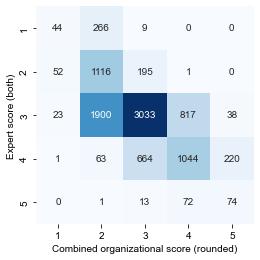

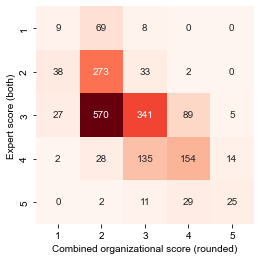

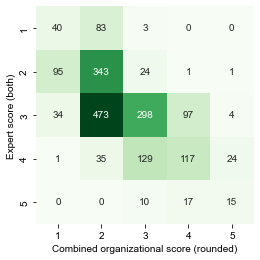

In [20]:
for dataset in df_expert.Dataset.unique():

    conf_mat = confusion_matrix(
        df_expert_melt[df_expert_melt.Dataset==dataset]['Expert score'],
        df_expert_melt[df_expert_melt.Dataset==dataset]['Combined organizational score (rounded)']
    )

    data_colors = {"OldFish": "Blues", "NewFish": "Reds", "Live": "Greens"}
    
    dims = (4, 4)
    fig, ax = plt.subplots(figsize=dims)
    conf_mat_plot = sns.heatmap(
        conf_mat,
        annot=True,
        fmt="d",
        square=True,
        cmap=data_colors[dataset],
        cbar=False,
    )

    conf_mat_plot.set(
        xlabel='Combined organizational score (rounded)',
        ylabel='Expert score (both)',
    );
    conf_mat_plot.set_xticklabels([1,2,3,4,5])
    conf_mat_plot.set_yticklabels([1,2,3,4,5]);

    # save png and svg
    if SAVE:
        plt.savefig(save_dir_pngs/f"fig4c_expert_both_COS_conf_mat_{dataset}.png", dpi=300, bbox_inches = "tight")
        plt.savefig(save_dir_svgs/f"fig4c_expert_both_COS_conf_mat_{dataset}.svg", format="svg", bbox_inches = "tight")

### Figure 4D COS histogram by expert score

Histogram comparing the expert annotations of organization to the COS, colored by expert annotation score: 1–2 (blue), 3 (orange), or 4–5 (green). n = 6,677 cells, which includes cells from the training set (n = 4,823 cells), test set 1 (n = 932 cells), and test set 2 (n = 922 cells).

In [21]:
def group_human_scores(df):
    df["Expert structural annotation score (roundup)"] = np.ceil(
        df["Expert structural annotation score (mean)"]
    ).astype(int)
    df["Expert structural annotation score (grouped)"] = df[
        "Expert structural annotation score (roundup)"
    ].map({1: "1-2", 2: "1-2", 3: "3", 4: "4-5", 5: "4-5"})
    return df

In [22]:
df_expert = group_human_scores(df_expert)

/var/folders/57/fdjppnf50nv2j54_fc_5kcr00000gn/T/ipykernel_3063/522275984.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Expert structural annotation score (roundup)"] = np.ceil(
/var/folders/57/fdjppnf50nv2j54_fc_5kcr00000gn/T/ipykernel_3063/522275984.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Expert structural annotation score (grouped)"] = df[


In [23]:
df_expert.shape

(6677, 69)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

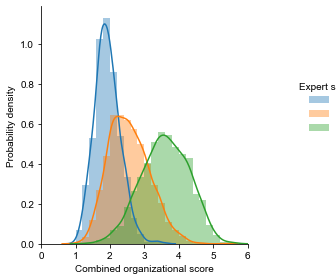

In [24]:
bins = np.linspace(0,6,31)

g = sns.FacetGrid(
    df_expert,
    hue='Expert structural annotation score (grouped)',
    hue_order=["1-2", "3", "4-5"],
    height=4
)
g = g.map(
    sns.distplot,
    'Combined organizational score',
    bins=bins
).add_legend()

g.set(xlim=(0, 6));
g._legend.set(bbox_to_anchor=(0.75, 0.6))
g._legend.set_title("Expert score  ")
g.set(ylabel='Probability density');

# save png and svg
if SAVE:
    plt.savefig(save_dir_pngs/'fig4d_linear_model_distplot_grouped_by_human_score.png', dpi=300, bbox_inches = "tight")
    plt.savefig(save_dir_svgs/'fig4d_linear_model_distplot_grouped_by_human_score.svg', format="svg", bbox_inches = "tight")

### Figure 4E Histograms of Fraction cell area organized z-disks and Fraction fibers by grouped org score

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

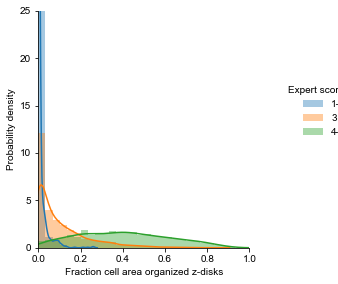

In [25]:
bins = np.linspace(0,1,31)

g = sns.FacetGrid(
    df_expert,
    hue="Expert structural annotation score (grouped)",
    hue_order=["1-2", "3", "4-5"],
    height=4
)
g = g.map(
    sns.distplot,
    'Fraction cell area organized z-disks',
    bins=bins,
).add_legend()

g.set(xlim=(0, 1));
g.set(ylim=(0, 25));
g._legend.set(bbox_to_anchor=(0.75, 0.6))
g._legend.set_title("Expert score      ")

g.set(ylabel='Probability density');

# save png and svg
if SAVE:
    plt.savefig(save_dir_pngs/'fig4e_regular_stripes_distplot_grouped_by_human_score.png', dpi=300, bbox_inches = "tight")
    plt.savefig(save_dir_svgs/'fig4e_regular_stripes_distplot_grouped_by_human_score.svg', format="svg", bbox_inches = "tight")

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

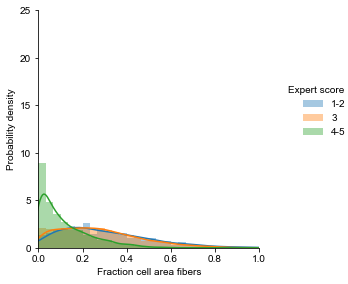

In [26]:
bins = np.linspace(0,1,31)

g = sns.FacetGrid(
    df_expert,
    hue="Expert structural annotation score (grouped)",
    hue_order=["1-2", "3", "4-5"],
    height=4
)
g = g.map(
    sns.distplot,
    'Fraction cell area fibers',
    bins=bins,
).add_legend()

g.set(xlim=(0, 1));
g.set(ylim=(0, 25));
g._legend.set(bbox_to_anchor=(0.75, 0.6))
g._legend.set_title("Expert score      ")

g.set(ylabel='Probability density');

# save png and svg
if SAVE:
    plt.savefig(save_dir_pngs/'fig4e_fibers_distplot_grouped_by_human_score.png', dpi=300, bbox_inches = "tight")
    plt.savefig(save_dir_svgs/'fig4e_fibers_distplot_grouped_by_human_score.svg', format="svg", bbox_inches = "tight")

### Figure 4F COS distribution in live data by cell age

Histogram showing the distribution of COSs for D18 (blue), D25 (purple), and D32 (pink) cells; COS score calculation was applied to cardiomyocytes that were imaged live across these three timepoints (shown in Figure 1, part 4). n = 18,045 cells.

In [27]:
df[df.Dataset=="Live"].shape

(18045, 66)

In [28]:
DAY_18_COLOR = "#0098EA"
DAY_32_COLOR = "#FFB2FF"
DAY_25_COLOR = "#9D02D7"
DAY_COLOR_PALETTE_THREE = sns.color_palette([DAY_18_COLOR, DAY_25_COLOR, DAY_32_COLOR])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

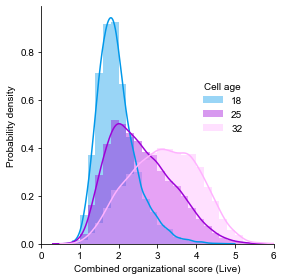

In [29]:
bins = np.linspace(0,6,31)

g = sns.FacetGrid(
    df[df.Dataset=="Live"],
    hue="Cell age",
    hue_order=[18, 25, 32],
    height=4,
    palette=DAY_COLOR_PALETTE_THREE
)
g = g.map(
    sns.distplot,
    'Combined organizational score',
    bins=bins
).add_legend()

g.set(xlim=(0, 6));
g._legend.set(bbox_to_anchor=(0.75, 0.6))
g.set(ylabel='Probability density', xlabel='Combined organizational score (Live)');

# save png and svg
if SAVE:
    plt.savefig(save_dir_pngs/'fig4f_live_cos_distplot_grouped_by_cell_age.png', dpi=300, bbox_inches = "tight")
    plt.savefig(save_dir_svgs/'fig4f_live_cos_distplot_grouped_by_cell_age.svg', format="svg", bbox_inches = "tight")

### Figure 5B ACTN2 correlations (transcript, protein, COS)

First calc ACTN2 protein density

In [30]:
df["alpha-actinin protein intensity (density)"] = df[
    "alpha-actinin protein intensity (sum)"
]/df["Cell area (μm^2)"]

df["alpha-actinin protein intensity (density, background subtracted)"] = df[
    "alpha-actinin protein intensity (sum, background subtracted)"
]/df["Cell area (μm^2)"]

In [31]:
df[(df.ge_wellID.isin(["5500000075-B3", "5500000322-B2", "5500000323-B2", "5500000322-B5", "5500000323-B5"]))][["alpha-actinin protein intensity (density, background subtracted)", "Combined organizational score"]].corr(method="spearman")

alpha-actinin protein intensity (density, background subtracted)  \
alpha-actinin protein intensity (density, backg...                                            1.00000                  
Combined organizational score                                                                 0.16352                  

                                                    Combined organizational score  
alpha-actinin protein intensity (density, backg...                        0.16352  
Combined organizational score                                             1.00000

#### Make df w/ all live and fish actn2 wells

In [32]:
actn2_df = df[(df.ge_wellID.isin(["5500000075-B3", "5500000322-B2", "5500000323-B2"])) | (df.Dataset=="Live")].copy().reset_index(drop=True)

In [33]:
actn2_df["ACTN2 (count/μm^2)"].isna().sum()

18045

In [34]:
actn2_df.shape

(19076, 68)

In [35]:
actn2_df[actn2_df.Type=="FISH"]["ge_wellID"].unique()

array(['5500000075-B3', '5500000322-B2', '5500000323-B2'], dtype=object)

### Figure 5B all 3 ACTN2 d25 datasets combined, protein density vs. ACTN2 transcript density

In [36]:
actn2_df[actn2_df.Type=="FISH"][["alpha-actinin protein intensity (density, background subtracted)", "ACTN2 (count/μm^2)"]].corr(method="spearman")

alpha-actinin protein intensity (density, background subtracted)  \
alpha-actinin protein intensity (density, backg...                                           1.000000                  
ACTN2 (count/μm^2)                                                                           0.308625                  

                                                    ACTN2 (count/μm^2)  
alpha-actinin protein intensity (density, backg...            0.308625  
ACTN2 (count/μm^2)                                            1.000000

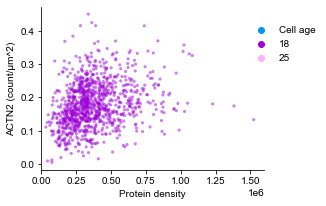

In [37]:
plt.figure(figsize=(4, 3))

p_scatter = sns.scatterplot(
    data=actn2_df[actn2_df.Type=="FISH"].sample(frac=1, replace=False).reset_index(drop=True),
    x="alpha-actinin protein intensity (density, background subtracted)",
    y="ACTN2 (count/μm^2)",
    hue="Cell age",
    hue_order=[18, 25, 32],
    palette=DAY_COLOR_PALETTE_THREE,
    s=10,
    alpha=0.5,
    linewidth=0,
)
p_scatter.set(xlabel="Protein density");
p_scatter.set(xlim=(0, 1600000));

handles, _ = p_scatter.get_legend_handles_labels()
p_scatter.legend(handles, ["Cell age", "18", "25", "32"], bbox_to_anchor=(0.9, 0.6), frameon=False)
sns.despine()

# save png and svg
if SAVE:
    plt.savefig(save_dir_pngs/'fig5b_fixed_actn2_protein_transcript_density.png', dpi=300, bbox_inches = "tight")
    plt.savefig(save_dir_svgs/'fig5b_fixed_actn2_protein_transcript_density.svg', format="svg", bbox_inches = "tight")

### Figure 5C fixed ACTN2 COS vs. protein density

In [38]:
actn2_df[actn2_df.Type=="FISH"][["Combined organizational score", "alpha-actinin protein intensity (density, background subtracted)"]].corr(method="spearman")

Combined organizational score  \
Combined organizational score                                            1.000000   
alpha-actinin protein intensity (density, backg...                       0.108311   

                                                    alpha-actinin protein intensity (density, background subtracted)  
Combined organizational score                                                                0.108311                 
alpha-actinin protein intensity (density, backg...                                           1.000000

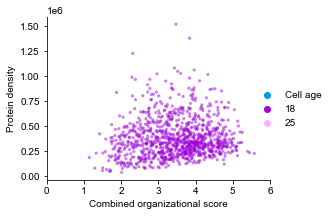

In [39]:
plt.figure(figsize=(4, 3))

p_scatter = sns.scatterplot(
    data=actn2_df[actn2_df.Type=="FISH"].dropna(subset=["alpha-actinin protein intensity (sum, background subtracted)"]).sample(frac=1, replace=False).reset_index(drop=True),
    x="Combined organizational score",
    y="alpha-actinin protein intensity (density, background subtracted)",
    hue="Cell age",
    hue_order=[18, 25, 32],
    palette=DAY_COLOR_PALETTE_THREE,
    s=10,
    alpha=0.5,
    linewidth=0,
)
p_scatter.set(ylabel="Protein density");
p_scatter.set(xlim=(0, 6));

handles, _ = p_scatter.get_legend_handles_labels()
p_scatter.legend(handles, ["Cell age", "18", "25", "32"], bbox_to_anchor=(0.9, 0.6), frameon=False)
sns.despine()

# save png and svg
if SAVE:
    plt.savefig(save_dir_pngs/'fig5c_fixed_actn2_cos_protein_density.png', dpi=300, bbox_inches = "tight")
    plt.savefig(save_dir_svgs/'fig5c_fixed_actn2_cos_protein_density.svg', format="svg", bbox_inches = "tight")

### Figure 5D all 3 ACTN2 d25 datasets combined, COS vs. ACTN2 transcript density

In [40]:
actn2_df[actn2_df.Type=="FISH"][["Combined organizational score", "ACTN2 (count/μm^2)"]].corr(method="spearman")

Combined organizational score  \
Combined organizational score                       1.000000   
ACTN2 (count/μm^2)                                  0.074448   

                               ACTN2 (count/μm^2)  
Combined organizational score            0.074448  
ACTN2 (count/μm^2)                       1.000000

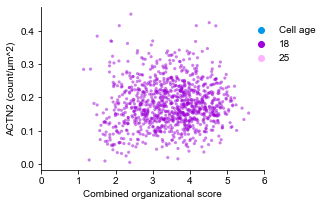

In [41]:
plt.figure(figsize=(4, 3))

p_scatter = sns.scatterplot(
    data=actn2_df[actn2_df.Type=="FISH"].dropna(subset=["alpha-actinin protein intensity (sum, background subtracted)"]).sample(frac=1, replace=False).reset_index(drop=True),
    x="Combined organizational score",
    y="ACTN2 (count/μm^2)",
    hue="Cell age",
    hue_order=[18, 25, 32],
    palette=DAY_COLOR_PALETTE_THREE,
    s=10,
    alpha=0.5,
    linewidth=0,
)
p_scatter.set(ylabel="ACTN2 (count/μm^2)");
p_scatter.set(xlim=(0, 6));

handles, _ = p_scatter.get_legend_handles_labels()
p_scatter.legend(handles, ["Cell age", "18", "25", "32"], bbox_to_anchor=(0.9, 0.6), frameon=False)
sns.despine()

# save png and svg
if SAVE:
    plt.savefig(save_dir_pngs/'fig5d_fixed_actn2_cos_transcript_density.png', dpi=300, bbox_inches = "tight")
    plt.savefig(save_dir_svgs/'fig5d_fixed_actn2_cos_transcript_density.svg', format="svg", bbox_inches = "tight")

### Figure 5E Live COS vs. protein density

In [42]:
actn2_df[actn2_df.Type=="Live"][
    ["Combined organizational score", "alpha-actinin protein intensity (density, background subtracted)"]
].corr(method="spearman")

Combined organizational score  \
Combined organizational score                                            1.000000   
alpha-actinin protein intensity (density, backg...                       0.240836   

                                                    alpha-actinin protein intensity (density, background subtracted)  
Combined organizational score                                                                0.240836                 
alpha-actinin protein intensity (density, backg...                                           1.000000

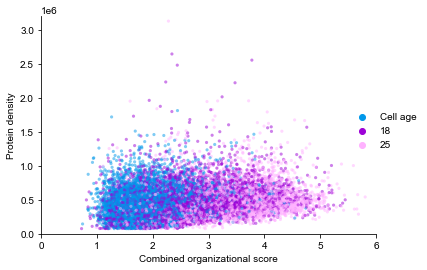

In [43]:
p_scatter = sns.scatterplot(
    data=actn2_df[actn2_df.Type=="Live"].dropna(subset=["alpha-actinin protein intensity (sum, background subtracted)"]).sample(frac=1, replace=False).reset_index(drop=True),
    x="Combined organizational score",
    y="alpha-actinin protein intensity (density, background subtracted)",
    hue="Cell age",
    hue_order=[18, 25, 32],
    palette=DAY_COLOR_PALETTE_THREE,
    s=10,
    alpha=0.5,
    linewidth=0,
)
p_scatter.set(ylabel="Protein density")
p_scatter.set(xlim=(0, 6))
p_scatter.set(ylim=(0, 3.2e6))

handles, _ = p_scatter.get_legend_handles_labels()
p_scatter.legend(handles, ["Cell age", "18", "25", "32"], bbox_to_anchor=(0.9, 0.6), frameon=False)
sns.despine()

# save png and svg
if SAVE:
    plt.savefig(save_dir_pngs/'fig5e_live_cos_protein_density.png', dpi=300, bbox_inches = "tight")
    plt.savefig(save_dir_svgs/'fig5e_live_cos_protein_density.svg', format="svg", bbox_inches = "tight")

In [44]:
actn2_df[actn2_df.Type=="Live"].groupby("Cell age")[
    ["Combined organizational score", "alpha-actinin protein intensity (density, background subtracted)"]
].corr(method="spearman")

Combined organizational score  \
Cell age                                                                                     
18       Combined organizational score                                            1.000000   
         alpha-actinin protein intensity (density, backg...                       0.185625   
25       Combined organizational score                                            1.000000   
         alpha-actinin protein intensity (density, backg...                       0.335849   
32       Combined organizational score                                            1.000000   
         alpha-actinin protein intensity (density, backg...                       0.304271   

                                                             alpha-actinin protein intensity (density, background subtracted)  
Cell age                                                                                                                       
18       Combined organizational score                                                                0.185625                 
         alpha-actinin protein intensity (density, backg...                                           1.000000                 
25       Combined organizational score                                                                0.335849                 
         alpha-actinin protein intensity (density, backg...                                           1.000000                 
32       Combined organizational score                                                                0.304271                 
         alpha-actinin protein intensity (density, backg...                                           1.000000

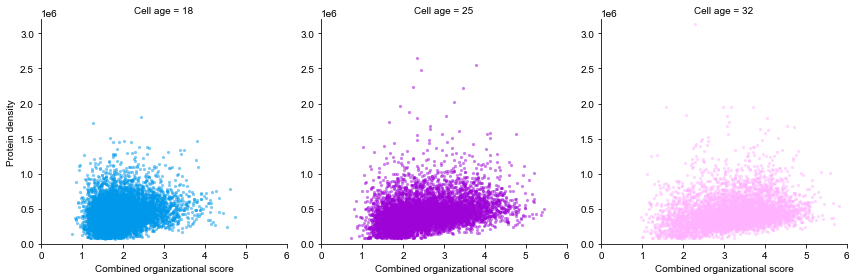

In [45]:
g = sns.FacetGrid(
    actn2_df[actn2_df.Type=="Live"].dropna(subset=["alpha-actinin protein intensity (sum, background subtracted)"]).sample(frac=1, replace=False).reset_index(drop=True),    col="Cell age",
    col_wrap=3,
    hue="Cell age",
    hue_order=[18, 25, 32],
    palette=DAY_COLOR_PALETTE_THREE,
    sharex=True,
    xlim=(0, 6),
    ylim=(0, 3.2e6),
    sharey=False,
    height=4.0,
    aspect=1.0,
)
g.map(
    sns.scatterplot,
    "Combined organizational score",
    "alpha-actinin protein intensity (density, background subtracted)",
    s=10,
    alpha=0.5,
    linewidth=0,
);

g.set_axis_labels(y_var="Protein density")

# save png and svg
if SAVE:
    plt.savefig(save_dir_pngs/'fig5e_live_cos_protein_density_cell_age.png', dpi=300, bbox_inches = "tight")
    plt.savefig(save_dir_svgs/'fig5e_live_cos_protein_density_cell_age.svg', format="svg", bbox_inches = "tight")

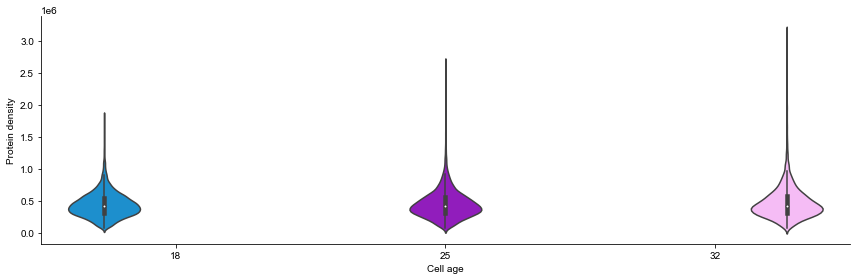

In [46]:
#plt.figure(figsize=(2,2))

p_viol = sns.catplot(
    kind="violin",
    split=False,
    data=actn2_df[actn2_df.Type=="Live"].dropna(subset=["alpha-actinin protein intensity (sum, background subtracted)"]).reset_index(drop=True),
    x="Cell age",
    order=[18, 25, 32],
    y="alpha-actinin protein intensity (density, background subtracted)",
    hue="Cell age",
    hue_order=[18, 25, 32],
    palette=DAY_COLOR_PALETTE_THREE,
    height=4,
    aspect=3,
)
sns.despine()
plt.ylabel("Protein density")

# save png and svg
if SAVE:
    plt.savefig(save_dir_pngs/'fig5e_live_protein_density_dist_cell_age.png', dpi=300, bbox_inches = "tight")
    plt.savefig(save_dir_svgs/'fig5e_live_protein_density_dist_cell_age.svg', format="svg", bbox_inches = "tight")

### Define bootstrap corr data wrangling function for ebars on bar plots

In [47]:
def pack_complex_corr_col(arg_df, arg_col1, arg_col2, outcol="Corr"):
    arg_df[outcol] = arg_df.apply(
        lambda row: np.complex(row[arg_col1], row[arg_col2]), axis="columns"
    )

def spearman_on_complex_col(tuple_col):
    return spearmanr(np.real(tuple_col), np.imag(tuple_col))[0]

### Figure 5F correlation bar plot (fixed, live -> COS, protein density, transcript density

#### COS vs protein density (fixed ACTN2 and live) Protein-> structure

/var/folders/57/fdjppnf50nv2j54_fc_5kcr00000gn/T/ipykernel_3063/85946003.py:3: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lambda row: np.complex(row[arg_col1], row[arg_col2]), axis="columns"


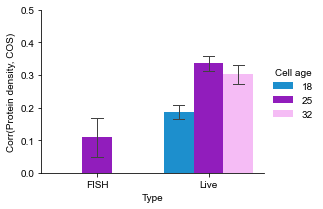

In [48]:
pack_complex_corr_col(
    actn2_df,
    "Combined organizational score",
    "alpha-actinin protein intensity (density, background subtracted)",
    outcol="Corr(Protein density, COS)",
)

plt.figure(figsize=(4,3))
p_bar = sns.barplot(
    data=actn2_df.dropna(subset=["Combined organizational score", "alpha-actinin protein intensity (sum, background subtracted)"]),
    x="Type",
    y="Corr(Protein density, COS)",
    hue="Cell age",
    hue_order=[18, 25, 32],
    palette=DAY_COLOR_PALETTE_THREE,
    estimator=spearman_on_complex_col,
    n_boot=1000,
    ci=95,
    errwidth=1,
    capsize=0.1,
);

p_bar.set(ylim=(0, 0.5));

sns.despine();

plt.legend(title="Cell age", bbox_to_anchor=(1.0, 0.7), frameon=False);

# save png and svg
if SAVE:
    plt.savefig(save_dir_pngs/'fig5f_fish_plus_live_cos_protein_density_corr.png', dpi=300, bbox_inches = "tight")
    plt.savefig(save_dir_svgs/'fig5f_fish_plus_live_cos_protein_density_corr.svg', bbox_inches = "tight")

In [49]:
for data_type in actn2_df.Type.unique():
    for age in actn2_df["Cell age"].unique():
        corr_boots = sns.algorithms.bootstrap(
                    actn2_df[(actn2_df.Type==data_type) & (actn2_df["Cell age"]==age)].dropna(subset=["Combined organizational score", "alpha-actinin protein intensity (sum, background subtracted)"])["Corr(Protein density, COS)"],
                    n_boot=1000,
                    func=spearman_on_complex_col
                )

        spearman_r = np.mean(corr_boots)
        ci_interval = sns.utils.ci(corr_boots, which=95)
        print(f"{data_type} Day: {age} spearman R: {spearman_r} ci_lower: {ci_interval[0]}, ci_upper: {ci_interval[1]}")

FISH Day: 25 spearman R: 0.1082761627751013 ci_lower: 0.04493875372462278, ci_upper: 0.17209211914116
FISH Day: 18 spearman R: nan ci_lower: nan, ci_upper: nan
FISH Day: 32 spearman R: nan ci_lower: nan, ci_upper: nan


/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Live Day: 25 spearman R: 0.33564417546053427 ci_lower: 0.3136023095866568, ci_upper: 0.3585605097185247
Live Day: 18 spearman R: 0.18547089133499678 ci_lower: 0.16332383642656714, ci_upper: 0.20922364751831296
Live Day: 32 spearman R: 0.30481920293576764 ci_lower: 0.276255947332933, ci_upper: 0.3333438961082771


#### COrrelation COS. vs transcript density (fixed only) Trascript -> structure

/var/folders/57/fdjppnf50nv2j54_fc_5kcr00000gn/T/ipykernel_3063/85946003.py:3: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lambda row: np.complex(row[arg_col1], row[arg_col2]), axis="columns"


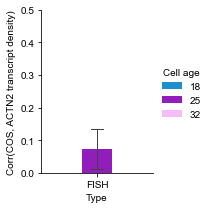

In [50]:
pack_complex_corr_col(
    actn2_df,
    "Combined organizational score",
    "ACTN2 (count/μm^2)",
    outcol="Corr(COS, ACTN2 transcript density)",
)

plt.figure(figsize=(2,3))
p_bar = sns.barplot(
    data=actn2_df.dropna(subset=["Combined organizational score", "ACTN2 (count/μm^2)"]),
    x="Type",
    y="Corr(COS, ACTN2 transcript density)",
    hue="Cell age",
    hue_order=[18, 25, 32],
    palette=DAY_COLOR_PALETTE_THREE,
    estimator=spearman_on_complex_col,
    n_boot=1000,
    ci=95,
    errwidth=1,
    capsize=0.1,
);
p_bar.set(ylim=(0, 0.5));


sns.despine();
plt.legend(title="Cell age", bbox_to_anchor=(1.0, 0.7), frameon=False);

# save png and svg
if SAVE:
    plt.savefig(save_dir_pngs/'fig5f_fish_cos_transcript_density_corr.png', dpi=300, bbox_inches = "tight")
    plt.savefig(save_dir_svgs/'fig5f_fish_cos_transcript_density_corr.svg', bbox_inches = "tight")

In [51]:
corr_boots = sns.algorithms.bootstrap(
            actn2_df.dropna(subset=["Combined organizational score", "ACTN2 (count/μm^2)"])["Corr(COS, ACTN2 transcript density)"],
            n_boot=1000,
            func=spearman_on_complex_col
        )

spearman_r = np.mean(corr_boots)
ci_interval = sns.utils.ci(corr_boots, which=95)
print(f"spearman R: {spearman_r} ci_lower: {ci_interval[0]}, ci_upper: {ci_interval[1]}")

spearman R: 0.07330968993804703 ci_lower: 0.014178002177091998, ci_upper: 0.13496939154472432


/var/folders/57/fdjppnf50nv2j54_fc_5kcr00000gn/T/ipykernel_3063/85946003.py:3: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lambda row: np.complex(row[arg_col1], row[arg_col2]), axis="columns"


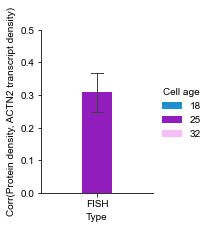

In [52]:
pack_complex_corr_col(
    actn2_df,
    "alpha-actinin protein intensity (density, background subtracted)",
    "ACTN2 (count/μm^2)",
    outcol="Corr(Protein density, ACTN2 transcript density)",
)

plt.figure(figsize=(2,3))
p_bar = sns.barplot(
    data=actn2_df.dropna(subset=["alpha-actinin protein intensity (density, background subtracted)", "ACTN2 (count/μm^2)"]),
    x="Type",
    y="Corr(Protein density, ACTN2 transcript density)",
    hue="Cell age",
    hue_order=[18, 25, 32],
    palette=DAY_COLOR_PALETTE_THREE,
    estimator=spearman_on_complex_col,
    n_boot=1000,
    ci=95,
    errwidth=1,
    capsize=0.1,
);
p_bar.set(ylim=(0, 0.5));


sns.despine();
plt.legend(title="Cell age", bbox_to_anchor=(1.0, 0.7), frameon=False);

# save png and svg
if SAVE:
    plt.savefig(save_dir_pngs/'fig5f_fish_protein_transcript_density_corr.png', dpi=300, bbox_inches = "tight")
    plt.savefig(save_dir_svgs/'fig5f_fish_protein_transcript_density_corr.svg', bbox_inches = "tight")

In [53]:
corr_boots = sns.algorithms.bootstrap(
            actn2_df.dropna(subset=["alpha-actinin protein intensity (density, background subtracted)", "ACTN2 (count/μm^2)"])["Corr(Protein density, ACTN2 transcript density)"],
            n_boot=1000,
            func=spearman_on_complex_col
        )

spearman_r = np.mean(corr_boots)
ci_interval = sns.utils.ci(corr_boots, which=95)
print(f"spearman R: {spearman_r} ci_lower: {ci_interval[0]}, ci_upper: {ci_interval[1]}")

spearman R: 0.30745998706731814 ci_lower: 0.2496317347462915, ci_upper: 0.36281609232442424


### Figure 6B cos vs transcript correlation bar plot

#### melt fish data for tidy plots

In [54]:
melt_feats = {
    "(count/μm^2)" : [c for c in df.columns if c.endswith("(count/μm^2)")]
}

melted_dfs = {
    feat:df[df.Type == 'FISH'].melt(
        id_vars=[c for c in df.columns if c not in cols],
        value_vars=cols,
        var_name="FISH probe",
        value_name=f"FISH probe {feat}",
    ).dropna(
        subset=[f"FISH probe {feat}"]
    ).reset_index(
        drop=True
    )
    for feat, cols in melt_feats.items()
}

for feat,v in melted_dfs.items():
    melted_dfs[feat]["FISH probe"] = melted_dfs[feat]["FISH probe"].str.split().str.get(0)

# TODO if counts make it back in will need to merge
df_fish_tidy = melted_dfs["(count/μm^2)"]

In [55]:
assert 2*len(df[df.Type == 'FISH']) == len(df_fish_tidy)

## Plot FISH vs cos

In [56]:
DAY_COLORS_3_PLUS_GREY = ["grey", DAY_18_COLOR, DAY_25_COLOR, DAY_32_COLOR]
DAY_COLOR_PALETTE_3_PLUS_GREY = sns.color_palette(DAY_COLORS_3_PLUS_GREY)

DAY_COLORS_2_PLUS_GREY = ["grey", DAY_18_COLOR, DAY_32_COLOR]
DAY_COLOR_PALETTE_2_PLUS_GREY = sns.color_palette(DAY_COLORS_2_PLUS_GREY)

### scatter plots

Scatterplots showing COL2A1, MYH7 and PLN transcript abundance from RNA FISH, reported as density (count/mm2) (y axis) versus COS (x axis). Transcript abundance is measured by FISH probe spot density (counts per mm2) in single cells; each dot represents a single cell (n = 717 for D18, n = 487 for D32, n = 1,204 total cells). 

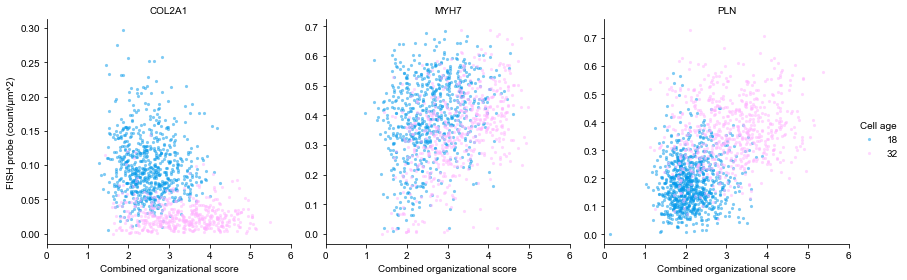

In [57]:
g = sns.FacetGrid(
    data=df_fish_tidy[df_fish_tidy["Cell age"].isin([18, 32])].sample(frac=1, replace=False).reset_index(drop=True),
    col="FISH probe",
    col_order=['COL2A1', 'MYH7', 'PLN'],
    col_wrap=3,
    hue="Cell age",
    hue_order=[18, 32],
    palette=DAY_COLOR_PALETTE,
    sharex=True,
    xlim=(0,6),
    sharey=False,
    height=4.0,
    aspect=1.0,
)

g = g.map(
    plt.scatter,
    "Combined organizational score",
    "FISH probe (count/μm^2)",
    s=10,
    alpha=0.5,
    linewidth=0,
).add_legend()

g.set_titles("{col_name}")

sns.despine()

# save png and svg
if SAVE:
    plt.savefig(save_dir_pngs/'fig6cde_probe_density_vs_org_score.png', dpi=300, bbox_inches = "tight")
    plt.savefig(save_dir_svgs/'fig6cde_probe_density_vs_org_score.svg', format="svg", bbox_inches = "tight")

### bar plots

Box plots showing the bootstrapped Spearman rank correlation between COS and transcript abundance of COL2A1, MYH7, and PLN. Correlation metrics are shown for each gene assayed by RNA FISH in alpha-actinin-2-mEGFP cardiomyocytes, for each time point as well as combined populations. Gray box plots indicate the correlation across all cells; blue and pink boxplots show the correlation for cells stratified by age (D18: blue, D32: pink). Mean Spearman rank correlations and 95% confidence intervals are listed in Table S4. Measurements where the bootstrapped interval crosses zero are not statistically significant.

/var/folders/57/fdjppnf50nv2j54_fc_5kcr00000gn/T/ipykernel_3063/85946003.py:3: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lambda row: np.complex(row[arg_col1], row[arg_col2]), axis="columns"


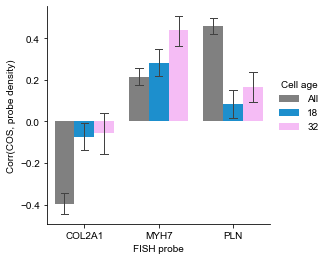

In [58]:
df_fish_tidy_dummy_all = df_fish_tidy.copy()
df_fish_tidy_dummy_all["Cell age"] = "All"
df_fish_tidy_dummy_all = df_fish_tidy_dummy_all.append(df_fish_tidy).reset_index(drop=True)

pack_complex_corr_col(
    df_fish_tidy_dummy_all,
    "Combined organizational score",
    "FISH probe (count/μm^2)",
    outcol="Corr(COS, probe density)",
)

plt.figure(figsize=(4, 4))
sns.barplot(
    data=df_fish_tidy_dummy_all[df_fish_tidy_dummy_all["Cell age"].isin(["All", 18, 32])].dropna(subset=["Combined organizational score", "FISH probe (count/μm^2)"]),
    x="FISH probe",
    y="Corr(COS, probe density)",
    order=['COL2A1', 'MYH7', 'PLN'],
    hue="Cell age",
    hue_order=["All", 18, 32],
    palette=DAY_COLOR_PALETTE_2_PLUS_GREY,
    estimator=spearman_on_complex_col,
    n_boot=1000,
    ci=95,
    errwidth=1,
    capsize=0.1,
    dodge=True,
);
sns.despine();
plt.legend(title="Cell age", bbox_to_anchor=(1.0, 0.7), frameon=False);

# save png and svg
if SAVE:
    plt.savefig(save_dir_pngs/'fig6b_probe_density_vs_org_score_by_day.png', dpi=300, bbox_inches = "tight")
    plt.savefig(save_dir_svgs/'fig6b_probe_density_vs_org_score_by_day.svg', format="svg", bbox_inches = "tight")

In [59]:
df_fish_tidy_dummy_all[df_fish_tidy_dummy_all["Cell age"].isin(["All", 18, 32])].groupby(["Cell age", "FISH probe"]).count()["Dataset"].to_csv("probe_cell_counts.csv", index=True)

### Spearman correlations and confidence intervals for Supplemenatry Table 3

Density plot shows marginal distribution transcript abundance for D18 (blue) and D32 (pink) timepoints.

In [60]:
x = "Combined organizational score"
y = "FISH probe (count/μm^2)"
col = "FISH probe"
hue = "Cell age"

df_corr_all = pd.DataFrame(columns = ["Dataset", col, hue, f"Spearman R ({x}, {y})"])

In [61]:
for probe in df_fish_tidy_dummy_all["FISH probe"].unique():
    for age in df_fish_tidy_dummy_all["Cell age"].unique():
        corr_boots = sns.algorithms.bootstrap(
            df_fish_tidy_dummy_all[(df_fish_tidy_dummy_all["FISH probe"] == probe) & (df_fish_tidy_dummy_all["Cell age"] == age)]["Corr(COS, probe density)"],
            n_boot=1000,
            func=spearman_on_complex_col
        )
        
        spearman_r = np.mean(corr_boots)
        ci_interval = sns.utils.ci(corr_boots, which=95)
        
        df_corr_all= df_corr_all.append(
                pd.DataFrame({
                    "Dataset": "FISH",
                    "FISH probe": [probe],
                    "Cell age": [age],
                    f"Spearman R ({x}, {y})": spearman_r,
                    "95 percent ci lower": ci_interval[0],
                    "95 percent ci upper": ci_interval[1]
                })
            )

/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


In [62]:
#df_corr_all.to_csv("gene_cos_transcript_spearmanr_20201207.csv", index=False)

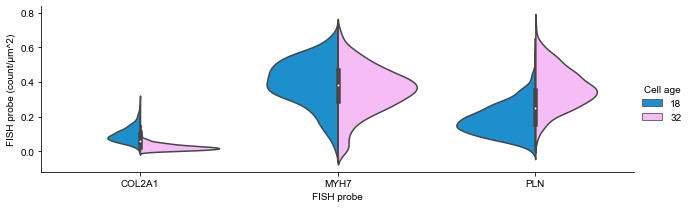

In [63]:
sns.catplot(
    kind="violin",
    split=True,
    data=df_fish_tidy[df_fish_tidy["Cell age"].isin([18, 32])],
    x="FISH probe",
    order=['COL2A1', 'MYH7', 'PLN'],
    y="FISH probe (count/μm^2)",
    hue="Cell age",
    hue_order=[18, 32],
    palette=DAY_COLOR_PALETTE,
    height=3,
    aspect=3
)
sns.despine()

# save png and svg
if SAVE:
    plt.savefig(save_dir_pngs/'fig6cde_probe_density_violins.png', dpi=300, bbox_inches = "tight")
    plt.savefig(save_dir_svgs/'fig6cde_probe_density_violins.svg', format="svg", bbox_inches = "tight")

## Supplamentary figures

### Supp Figure 2H Live heatmap of fraction area by class type

(7544, 68)
(6214, 68)
(4287, 68)


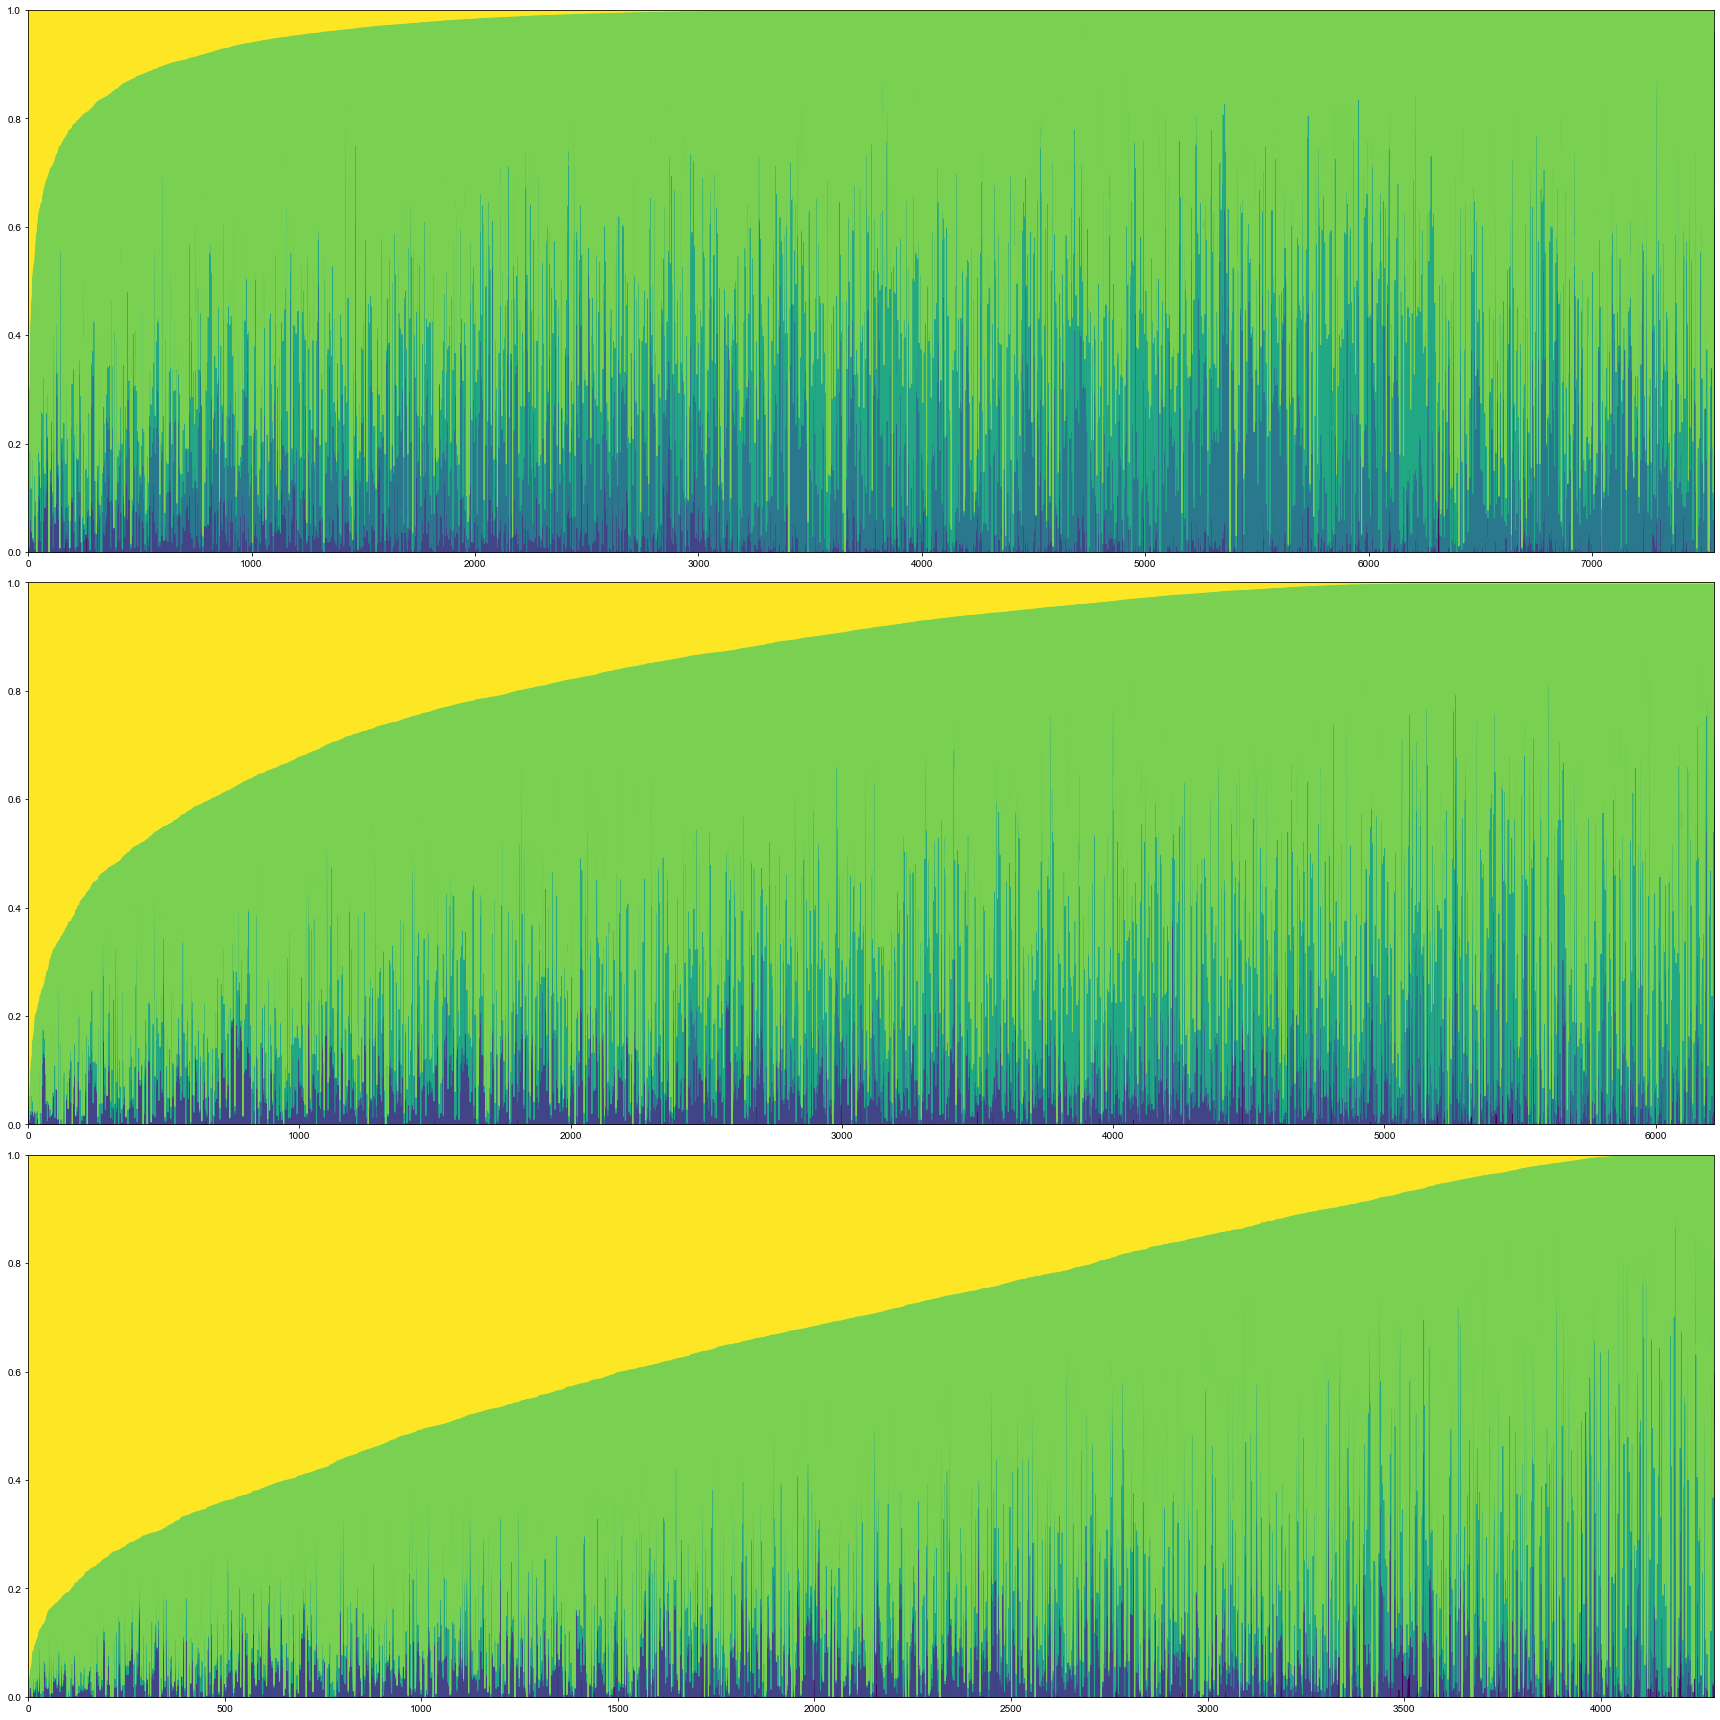

In [64]:
ranking_variable = 'Fraction cell area organized z-disks'
    
fig, ax = plt.subplots(3,1, figsize=(24,24))
for id_age, (age, df_age) in enumerate(df[df.Type=="Live"].groupby("Cell age")):
    df_age = df_age.sort_values(ranking_variable, ascending=False)
    print(df_age.shape)

    x = np.arange(df_age.shape[0])
    y = np.zeros(x.shape, dtype = np.float32)

    ax[id_age].set_ylim(0,1)
    ax[id_age].set_xlim(0,x.size)

    for id_yvar, yvar in enumerate(yvars_set1):
        y_sup = y + df_age[yvar].values
        ax[id_age].fill_between(x[:],y1=y,y2=y_sup, color=viridis(id_yvar/len(yvars_set1)))
        y = y_sup
        
plt.tight_layout()
if SAVE:
    plt.savefig(f'heatmap_rankby_{ranking_variable}.png')
    plt.savefig(save_dir_pngs/f'supp_fig2h_heatmap_rankby_{ranking_variable}.png', dpi=300, bbox_inches = "tight")
    plt.savefig(save_dir_svgs/f'supp_fig2h_heatmap_rankby_{ranking_variable}.svg', format="svg", bbox_inches = "tight")
plt.show()

#### Live heatmaps Experiment 1 (replate 2019-05-17)

(2714, 68)
(2109, 68)


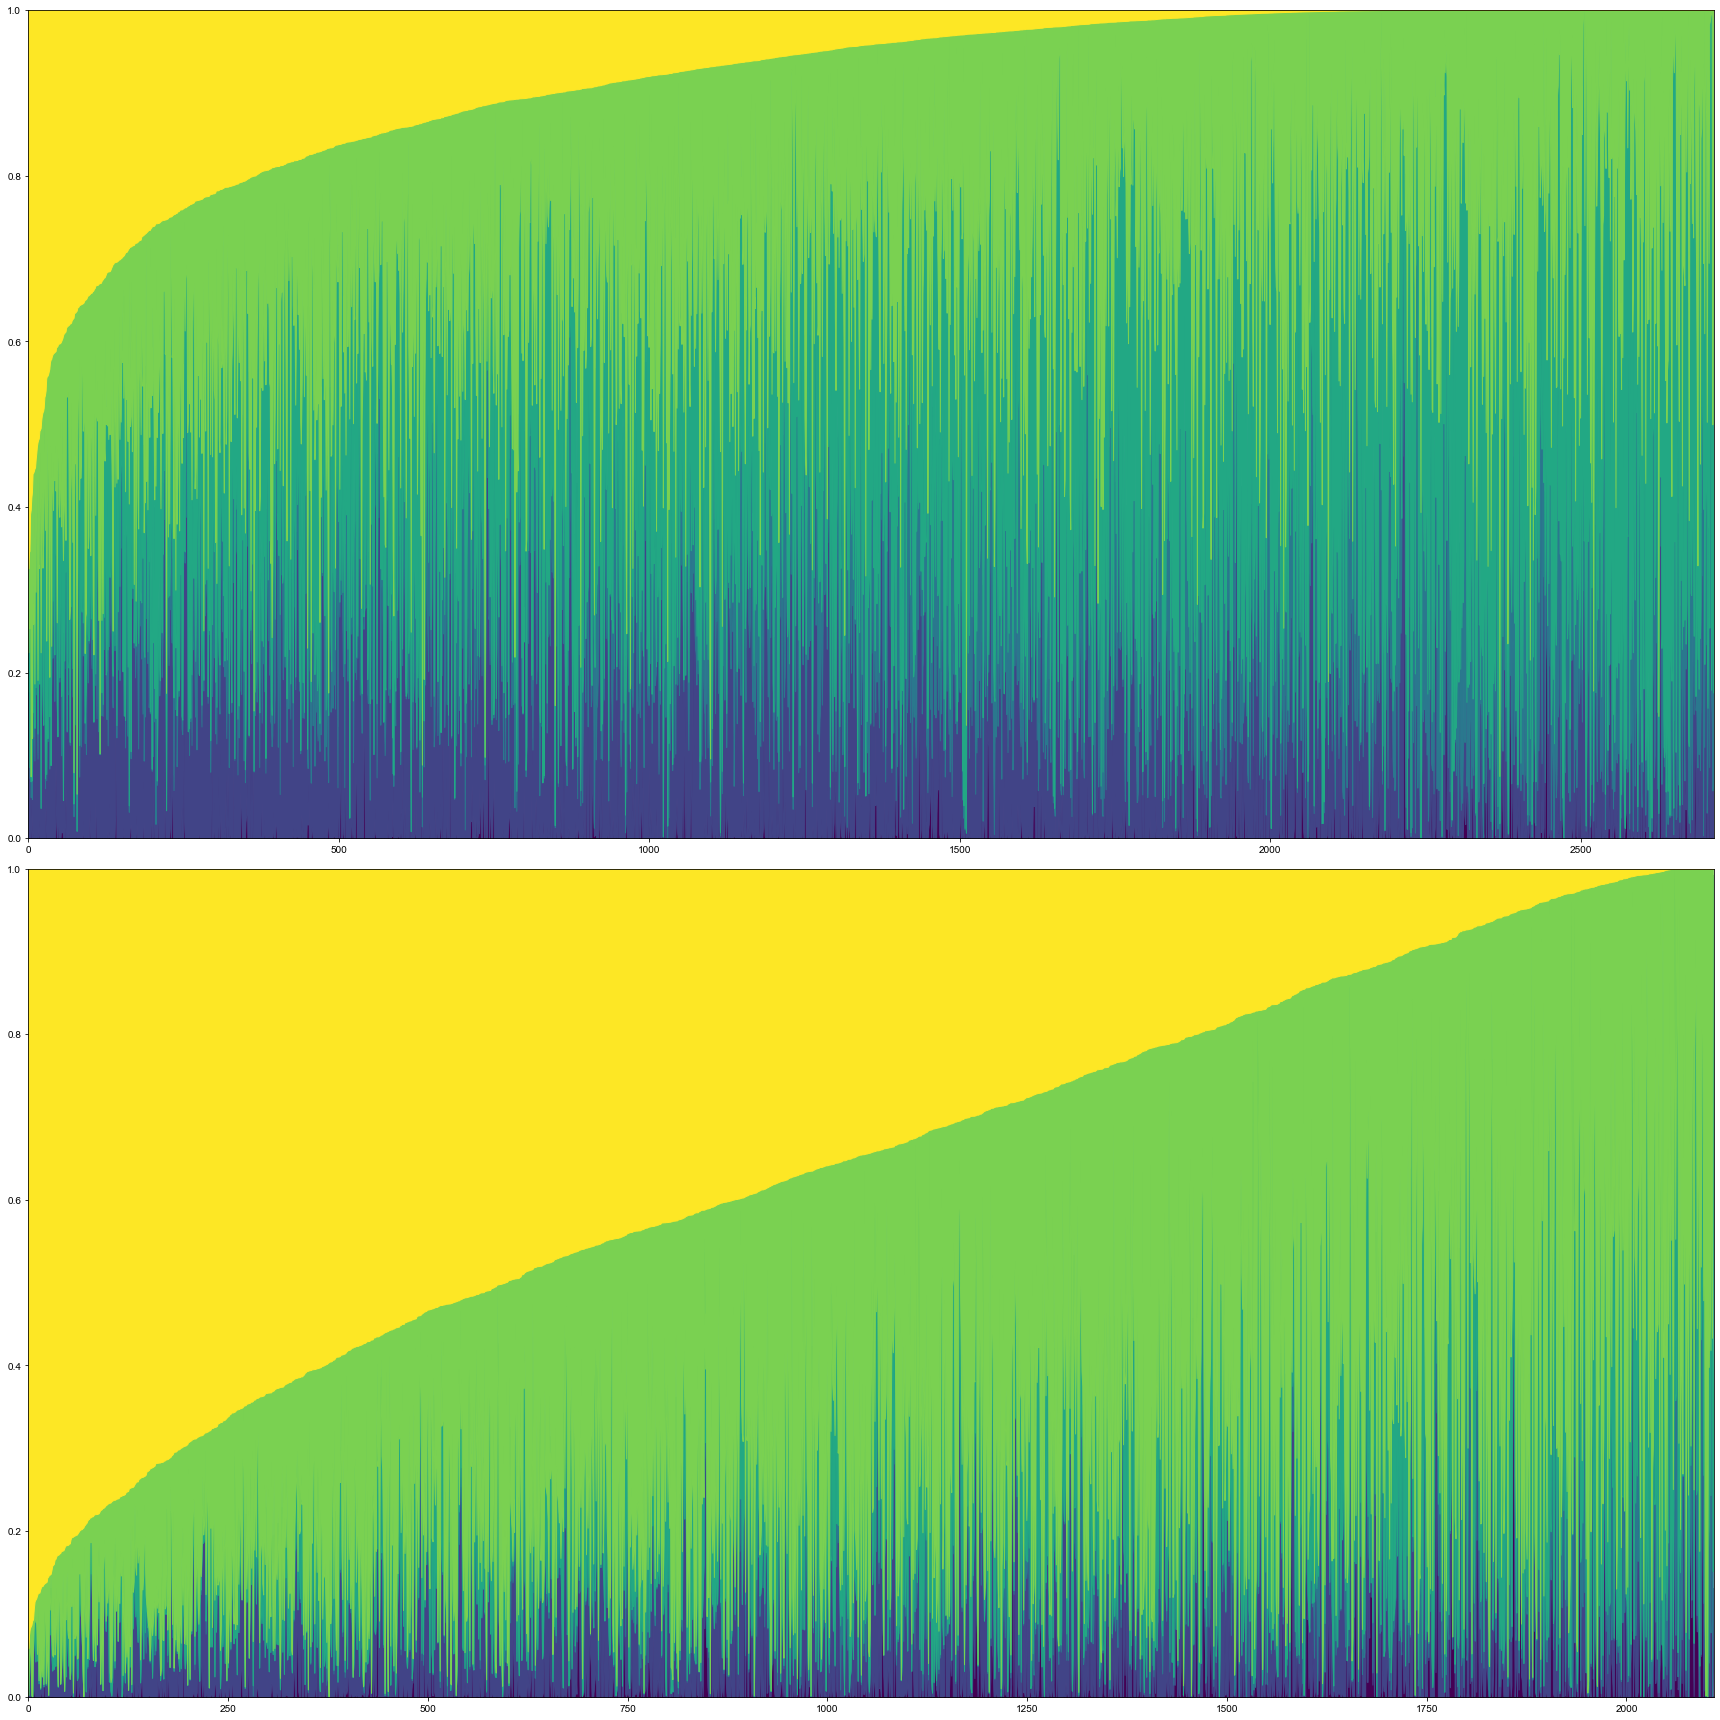

(3479, 68)
(2833, 68)


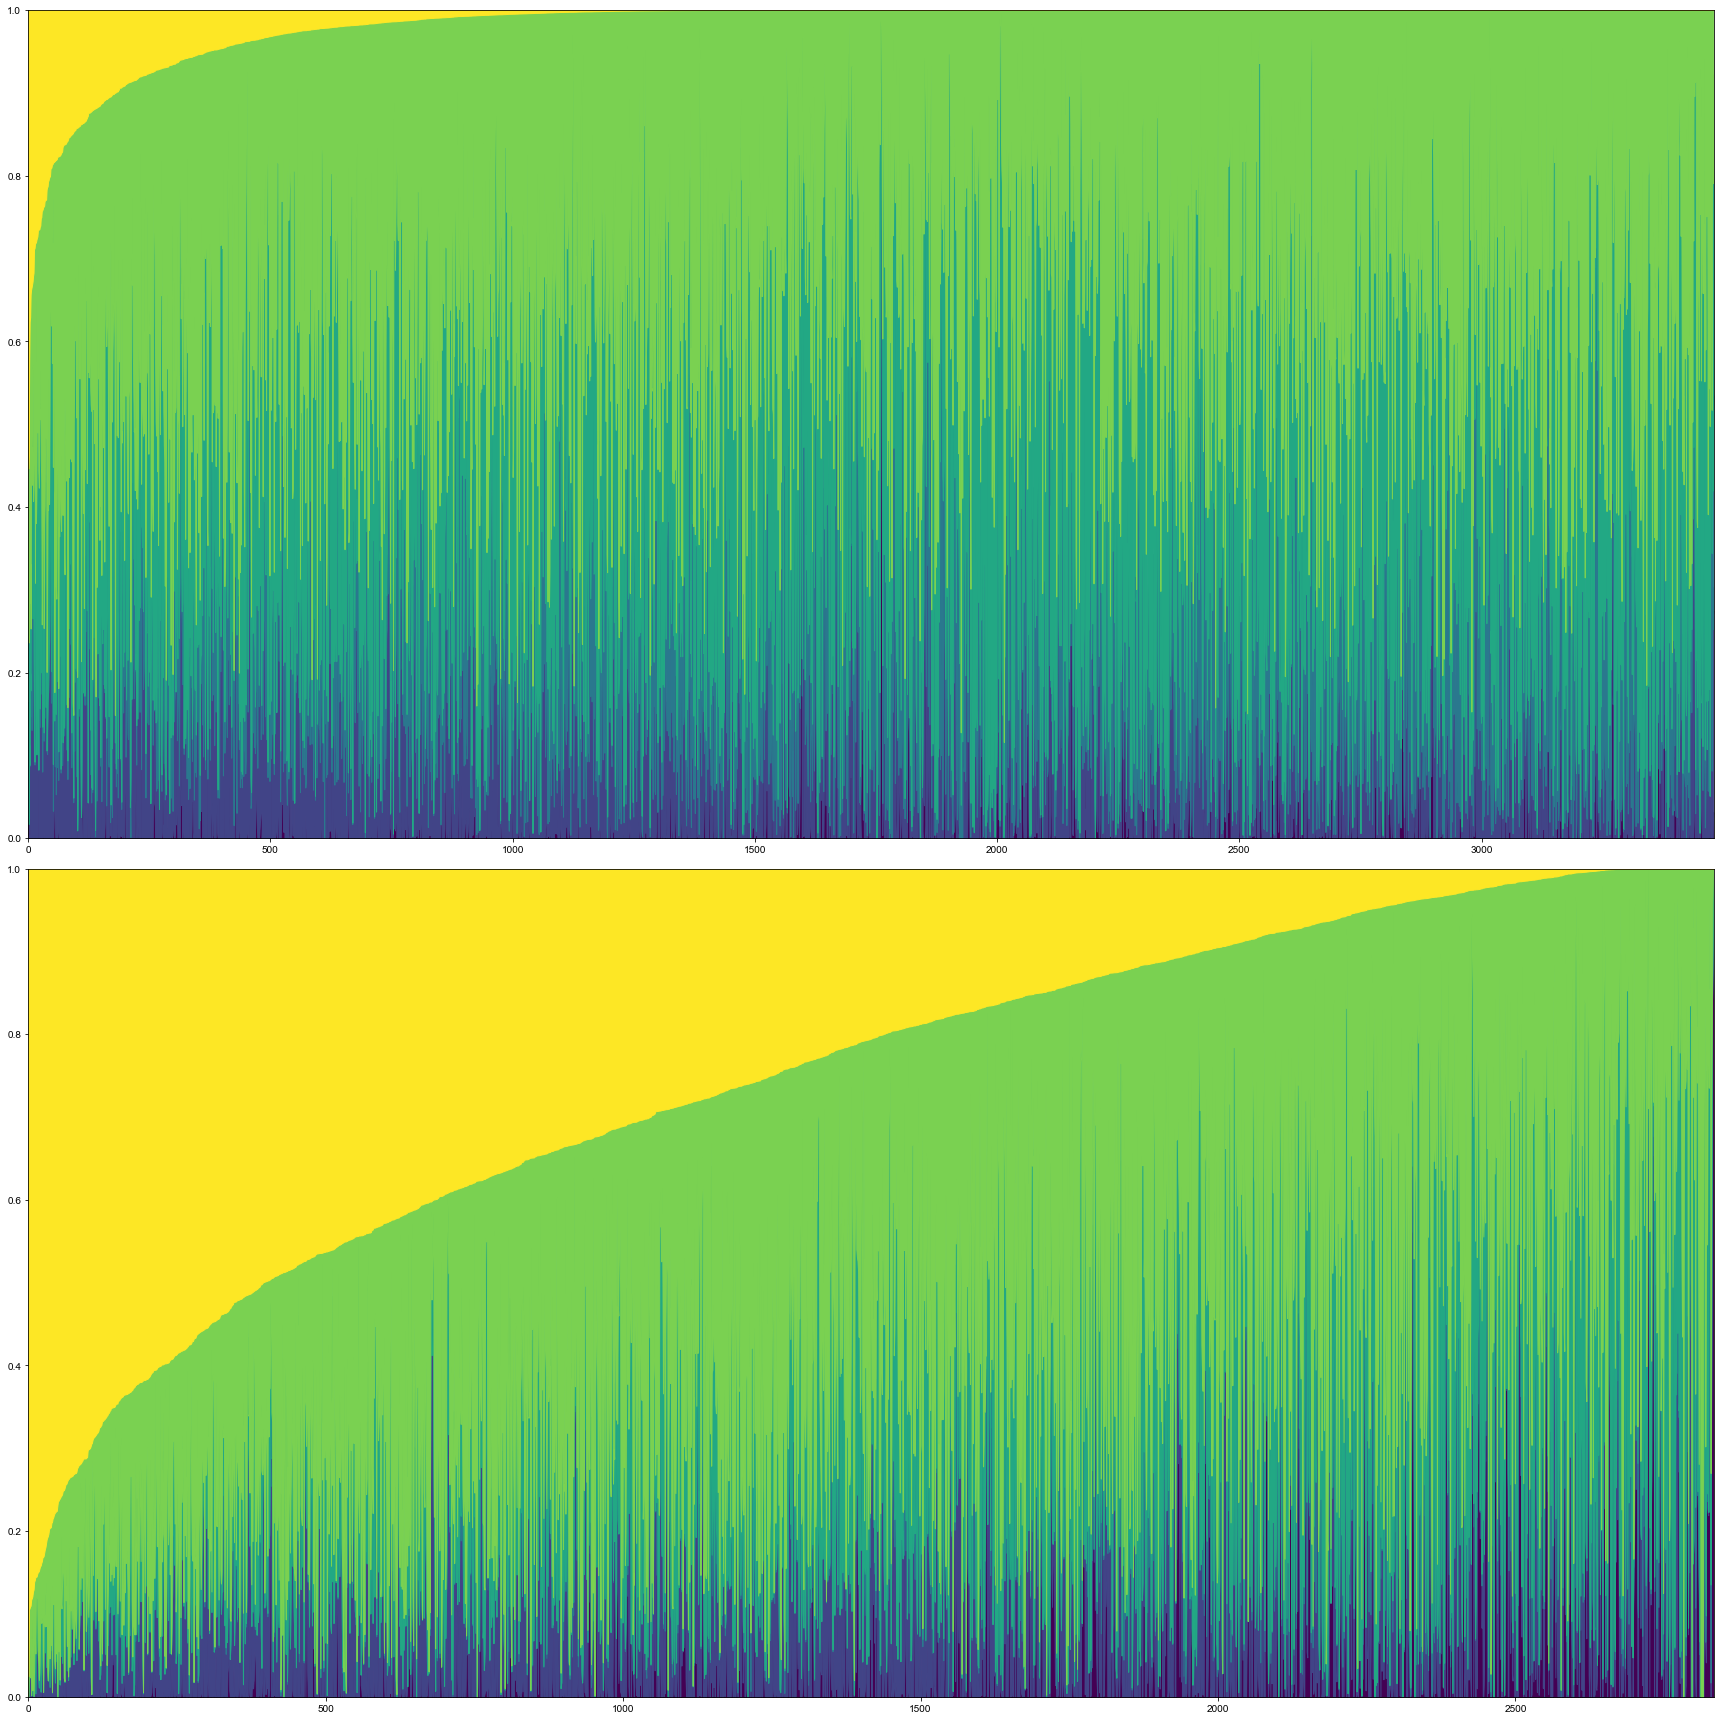

(1329, 68)
(974, 68)


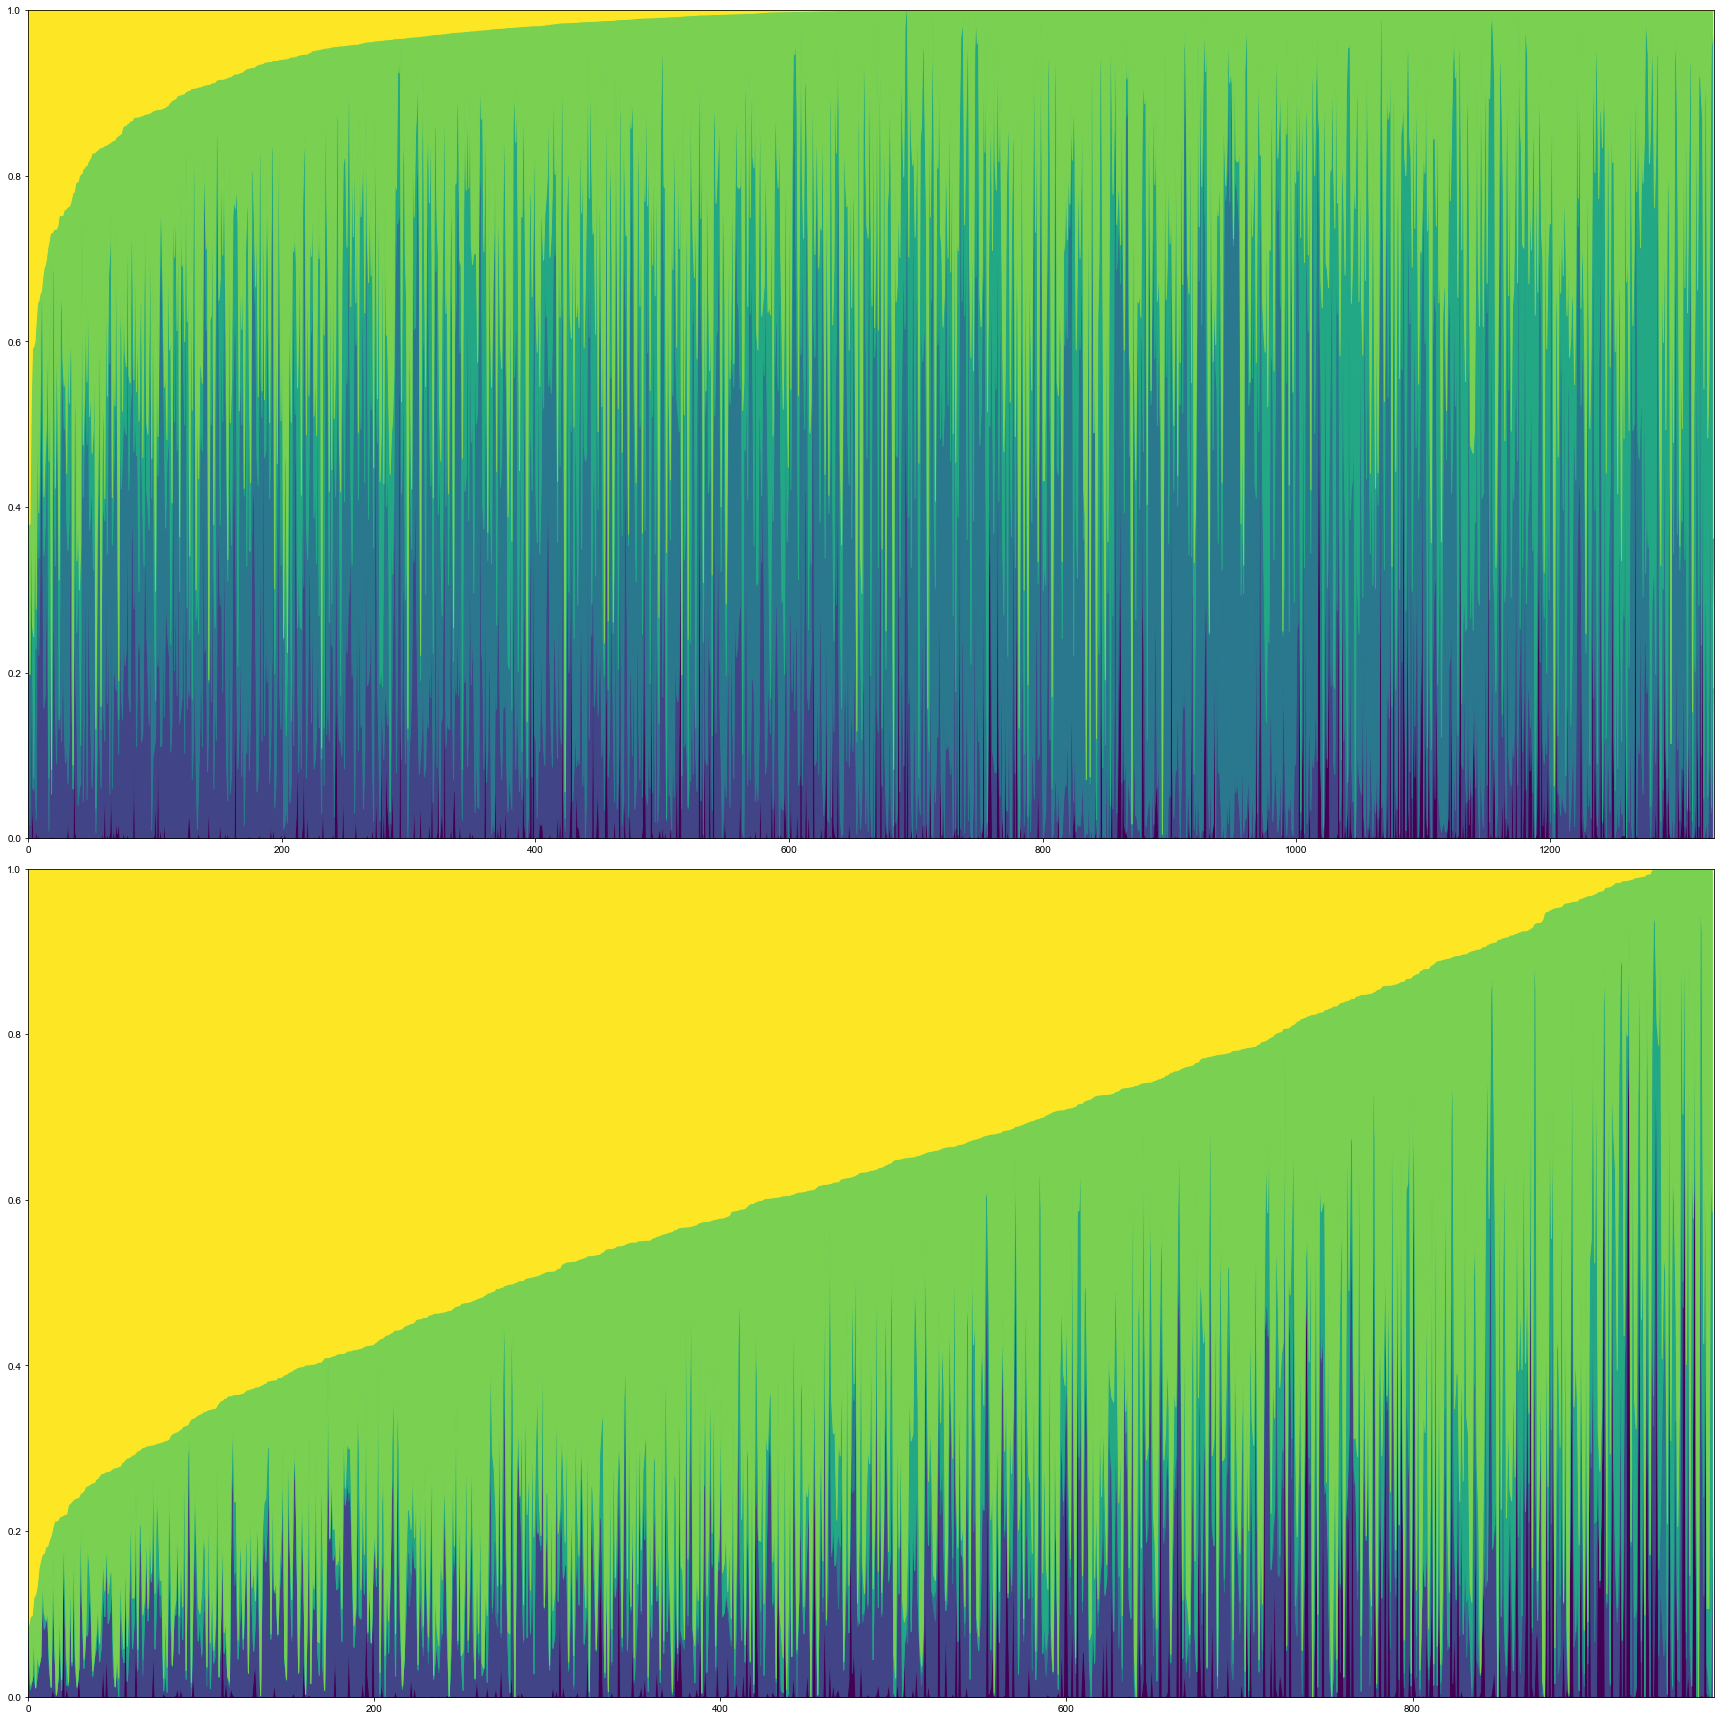

(2078, 68)
(1119, 68)


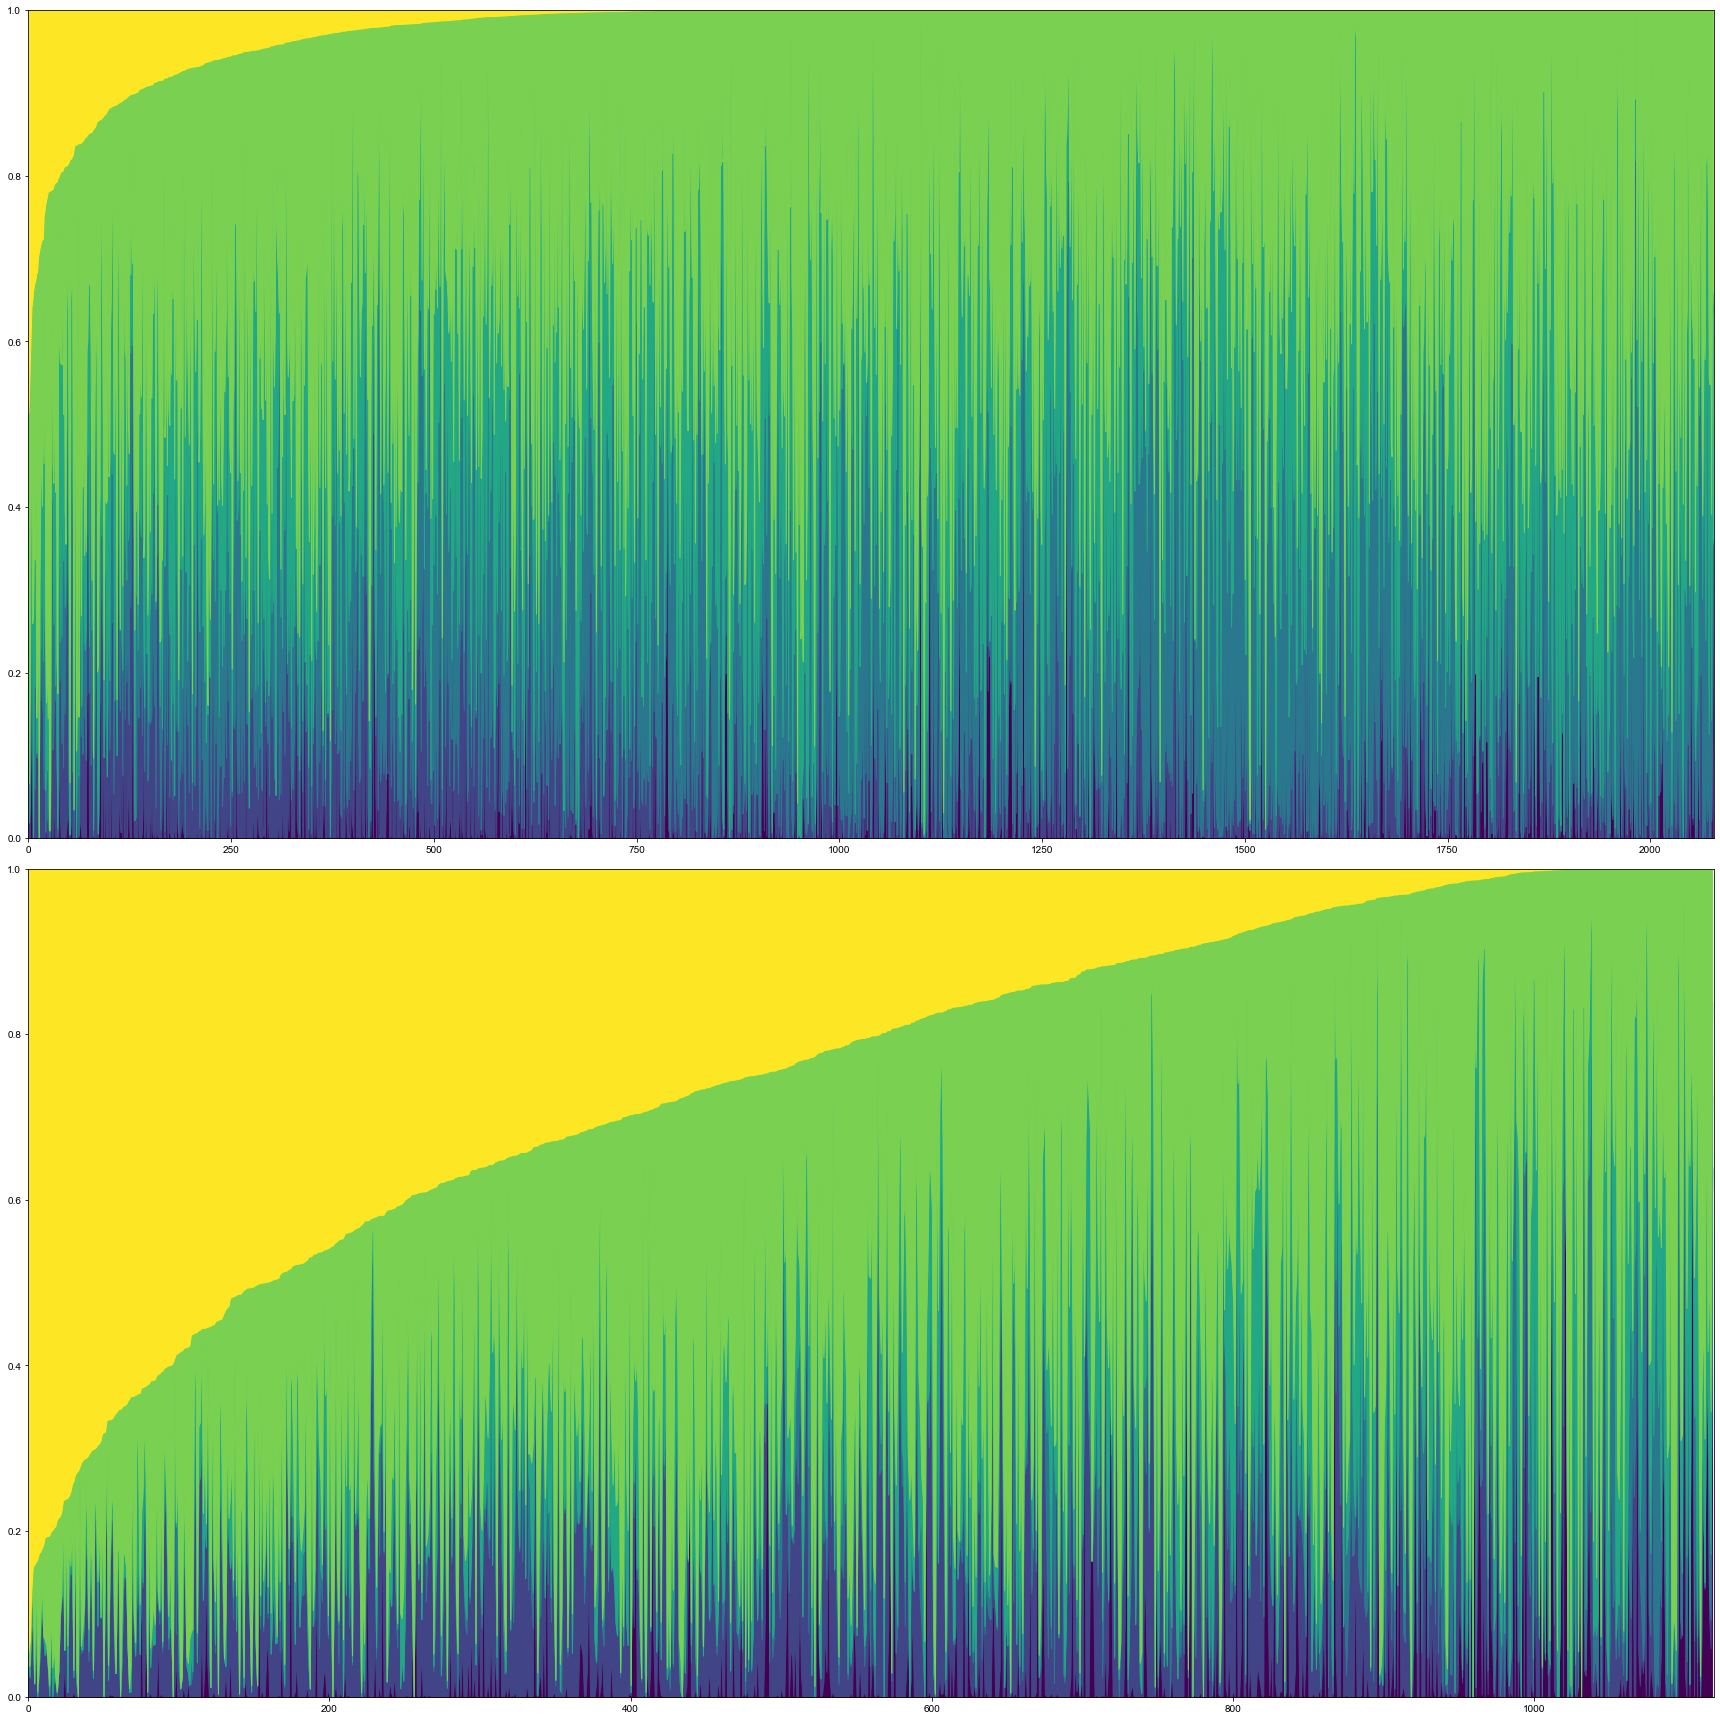

In [65]:
ranking_variable = 'Fraction cell area organized z-disks'
replates = {
    "exp1": "2019-05-17",
    "exp3": "2019-05-24"
}

for exp_type in df.Type.unique():
    for diff_exp in replates.keys():
        replate_date = replates[diff_exp]
        fig, ax = plt.subplots(2,1, figsize=(24,24))
        for id_age, (age, df_age) in enumerate(df[(df.Type==exp_type) & (df.replate_date==replate_date) & (df["Cell age"].isin([18, 32]))].groupby("Cell age")):
            df_age = df_age.sort_values(ranking_variable, ascending=False)
            print(df_age.shape)

            x = np.arange(df_age.shape[0])
            y = np.zeros(x.shape, dtype = np.float32)

            ax[id_age].set_ylim(0,1)
            ax[id_age].set_xlim(0,x.size)

            for id_yvar, yvar in enumerate(yvars_set1):
                y_sup = y + df_age[yvar].values
                ax[id_age].fill_between(x[:],y1=y,y2=y_sup, color=viridis(id_yvar/len(yvars_set1)))
                y = y_sup

        plt.tight_layout()
        if SAVE:
            plt.savefig(f'heatmap_rankby_{ranking_variable}.png')
            plt.savefig(save_dir_pngs/f'supp_fig2h_heatmap_rankby_{ranking_variable}_{exp_type}_{diff_exp}.png', dpi=300, bbox_inches = "tight")
            plt.savefig(save_dir_svgs/f'supp_fig2h_heatmap_rankby_{ranking_variable}_{exp_type}_{diff_exp}.svg', format="svg", bbox_inches = "tight")
        plt.show()

### Supp Figure 2I bar plot of expert scores

In [66]:
df_corrs_exp_both_cos["Expert-COS correlation (both)"]

0    0.673317
1    0.632085
2    0.665655
Name: Expert-COS correlation (both), dtype: float64

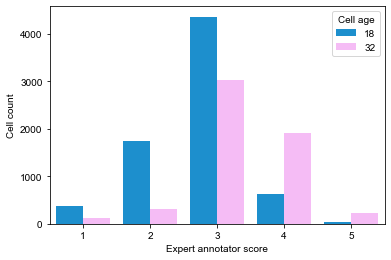

In [67]:
dims = (6, 4)
fig, ax = plt.subplots(figsize=dims)

score_count_plot = sns.countplot(
    x="Expert score",
    hue="Cell age",
    data=df_expert_melt[df_expert_melt["Cell age"].isin([18, 32])],
    palette=DAY_COLOR_PALETTE
)
score_count_plot.set(
    xlabel='Expert annotator score',
    ylabel='Cell count',
)

score_count_plot.set_xticklabels([1,2,3,4,5])
#score_count_plot.set_yticklabels([1,2,3,4,5]);

if SAVE:
    plt.savefig(save_dir_pngs/f"supp_fig2i_expert_by_day18_32.png", dpi=300, bbox_inches = "tight")
    plt.savefig(save_dir_svgs/f"supp_fig2i_expert_by_day18_32.svg", format="svg", bbox_inches = "tight")

### Supp Figure 2J Expert vs. Expert confusion matrix

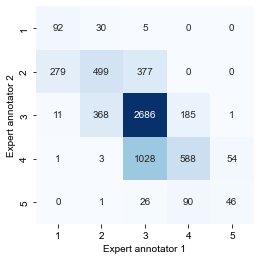

In [68]:
conf_mat = confusion_matrix(
        df_expert[df_expert["Cell age"].isin([18, 32])]["kg_structure_org_score"],
        df_expert[df_expert["Cell age"].isin([18, 32])]["mh_structure_org_score"]
    )

    #data_colors = {"OldFish": "Blues", "NewFish": "Reds", "Live": "Greens"}
    
dims = (4, 4)
fig, ax = plt.subplots(figsize=dims)
conf_mat_plot = sns.heatmap(
    conf_mat,
    annot=True,
    fmt="d",
    square=True,
    cmap="Blues",
    cbar=False,
)

conf_mat_plot.set(
    xlabel='Expert annotator 1',
    ylabel='Expert annotator 2',
)
conf_mat_plot.set_xticklabels([1,2,3,4,5])
conf_mat_plot.set_yticklabels([1,2,3,4,5]);

# save png and svg
if SAVE:
    plt.savefig(save_dir_pngs/f"supp_fig2j_expert_expert_COS_conf_mat.png", dpi=300, bbox_inches = "tight")
    plt.savefig(save_dir_svgs/f"supp_fig2j_expert_expert_COS_conf_mat.svg", format="svg", bbox_inches = "tight")

### Supp Figure 3B MCV, peak height and peak distance in expert scored cells by age

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


TypeError: 'NoneType' object is not callable

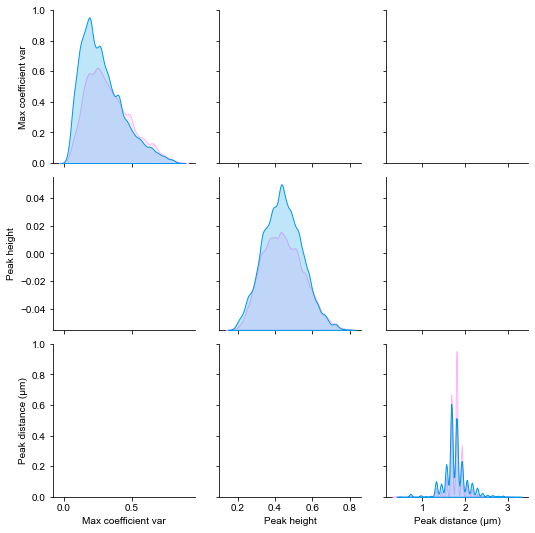

In [69]:
g = sns.pairplot(
    df_expert.sample(frac=1, replace=False).reset_index(drop=True),
    x_vars=['Max coefficient var', 'Peak height', 'Peak distance (μm)'],
    y_vars=['Max coefficient var', 'Peak height', 'Peak distance (μm)'],
    hue='Cell age',
    hue_order=[18, 32],
    palette=DAY_COLOR_PALETTE,
    plot_kws=dict(
        linewidth=0,
        alpha = 0.25,
        s=20
    ),
    diag_kws=dict(
        bw=0.1
    )
);

mcv_lims = (0,1)
ph_lims = (0.15,0.85)
pd_lims = (0.5,3.0)

g.axes[0,0].set_xlim(mcv_lims)
g.axes[1,1].set_xlim(ph_lims)
g.axes[2,2].set_xlim(pd_lims)

g.axes[0,1].set_xlim(ph_lims)
g.axes[0,1].set_ylim(mcv_lims)
g.axes[1,0].set_xlim(mcv_lims)
g.axes[1,0].set_ylim(ph_lims)

g.axes[0,2].set_xlim(pd_lims)
g.axes[0,2].set_ylim(mcv_lims)
g.axes[2,0].set_xlim(mcv_lims)
g.axes[2,0].set_ylim(pd_lims)

g.axes[1,2].set_xlim(pd_lims)
g.axes[1,2].set_ylim(ph_lims)
g.axes[2,1].set_xlim(ph_lims)
g.axes[2,1].set_ylim(pd_lims);

plt.subplots_adjust(hspace=0.2, wspace=0.2)
g._legend.set_bbox_to_anchor((1.05, 0.5))

# save png and svg
if SAVE:
    plt.savefig(save_dir_pngs/f'supp_fig3b_global_alignment_correlations_day.png', dpi=300, bbox_inches = "tight")
    plt.savefig(save_dir_svgs/f'supp_fig3b_global_alignment_correlations_day.svg', format="svg", bbox_inches = "tight")

### Supp Figure 3B MCV, peak height and peak distance in expert scored cells by expert score

In [ ]:
g = sns.pairplot(
    df_expert[df_expert["Cell age"].isin([18, 32])].sample(frac=1, replace=False).reset_index(drop=True),
    x_vars=['Max coefficient var', 'Peak height', 'Peak distance (μm)'],
    y_vars=['Max coefficient var', 'Peak height', 'Peak distance (μm)'],
    hue="Expert structural annotation score (grouped)",
    hue_order=["1-2", "3", "4-5"],
    aspect=1,
    plot_kws=dict(
        linewidth=0,
        alpha = 0.25,
        s=20
    ),
    diag_kws=dict(
        bw=0.1
    )
);

mcv_lims = (0,1)
ph_lims = (0.15,0.85)
pd_lims = (0.5,3.0)

g.axes[0,0].set_xlim(mcv_lims)
g.axes[1,1].set_xlim(ph_lims)
g.axes[2,2].set_xlim(pd_lims)

g.axes[0,1].set_xlim(ph_lims)
g.axes[0,1].set_ylim(mcv_lims)
g.axes[1,0].set_xlim(mcv_lims)
g.axes[1,0].set_ylim(ph_lims)

g.axes[0,2].set_xlim(pd_lims)
g.axes[0,2].set_ylim(mcv_lims)
g.axes[2,0].set_xlim(mcv_lims)
g.axes[2,0].set_ylim(pd_lims)

g.axes[1,2].set_xlim(pd_lims)
g.axes[1,2].set_ylim(ph_lims)
g.axes[2,1].set_xlim(ph_lims)
g.axes[2,1].set_ylim(pd_lims);

plt.subplots_adjust(hspace=0.2, wspace=0.2)
g._legend.set_bbox_to_anchor((0.8, 0.5))
g._legend.set_title("Expert score")

# save png and svg
if SAVE:
    plt.savefig(save_dir_pngs/f'supp_fig3b_global_alignment_correlations_score.png', dpi=300, bbox_inches = "tight")
    plt.savefig(save_dir_svgs/f'supp_fig3b_global_alignment_correlations_score.svg', format="svg", bbox_inches = "tight")

### Supp. 4A COS dist. in expert scored cells by dataset (training, bonus test, live test)

In [ ]:
bins = np.linspace(0,6,31)

g = sns.FacetGrid(
    df_expert,
    hue='Expert structural annotation score (grouped)',
    hue_order=["1-2", "3", "4-5"],
    col="Dataset",
    height=4
)
g = g.map(
    sns.distplot,
    'Combined organizational score',
    bins=bins
).add_legend()

g.set(xlim=(0, 6));
g._legend.set(bbox_to_anchor=(0.75, 0.6))
g._legend.set_title("Expert score  ")
g.set(ylabel='Probability density');

# save png and svg
if SAVE:
    plt.savefig(save_dir_pngs/'supp_fig4a_linear_model_distplot_grouped_by_human_score.png', dpi=300, bbox_inches = "tight")
    plt.savefig(save_dir_svgs/'supp_fig4a_linear_model_distplot_grouped_by_human_score.svg', format="svg", bbox_inches = "tight")

### Supp Figure 4B Cell features, local, and global alignment distributions for all expert scored cells

In [ ]:
lim_map={
    'Cell area (μm^2)': (0.0, 10_000),
     'Cell aspect ratio': (0.0, 1.0),
     'Fraction cell area background': (0.0, 1.0),
     'Fraction cell area diffuse/other': (0.0, 1.0),
     'Fraction cell area fibers': (0.0, 1.0),
     'Fraction cell area disorganized puncta': (0.0, 1.0),
     'Fraction cell area organized puncta': (0.0, 1.0),
     'Fraction cell area organized z-disks': (0.0, 1.0),
     'Max coefficient var': (0.0, 1.0),
     'Peak height': (0.0, 1.0),
     'Peak distance (μm)': (0.5, 3.0),
}

In [ ]:
for feature in BAR_PLOT_COLUMNS:

    bins = np.linspace(0,lim_map[feature][1],21)

    g = sns.FacetGrid(
        df_expert,
        hue='Expert structural annotation score (grouped)',
        hue_order=["1-2", "3", "4-5"],
        height=4
    );
    g = g.map(
        sns.distplot,
        feature,
        bins=bins,
        kde_kws=dict(bw=bins[-1]/len(bins))
    ).add_legend();

    row = reg_plot_ci_df[reg_plot_ci_df["Feature"]==feature].iloc[0,:]
    title = f'Organizational score feature weight = {row["Feature weight (mean)"]:.2f}\n95% CI = ({row["Feature weight (CI low)"]:.2f}, {row["Feature weight (CI high)"]:.2f})'
    
    g.set(
        xlim=lim_map[feature],
        xlabel=feature.replace("_", " ").capitalize(),
        ylabel='Probability density',
        title=title
    );
    g._legend.set(bbox_to_anchor=(0.6, 0.6))
    g._legend.set_title("Expert score    ")

    # save png and svg
    if SAVE:
        plt.savefig(save_dir_pngs/f'supp_fig4B_{safe(feature)}_distplot_grouped_by_human_score.png', dpi=300, bbox_inches = "tight");
        plt.savefig(save_dir_svgs/f'supp_fig4B_{safe(feature)}_distplot_grouped_by_human_score.svg', format="svg", bbox_inches = "tight");

### Supp Figure 4C All expert score vs COS

In [ ]:
dims = (4, 4)
fig, ax = plt.subplots(figsize=dims)

g = sns.stripplot(
    data=df_expert_melt.sample(frac=1, replace=False).reset_index(drop=True),
    x="Expert score",
    y="Combined organizational score",
    hue="Cell age",
    hue_order=[18, 32],
    palette=DAY_COLOR_PALETTE,
    alpha=0.2,
    linewidth=0,
    jitter=0.25,
    s=3
)

sns.despine()
plt.legend(bbox_to_anchor=(1.4, 0.6),frameon=False)

# save png and svg
if SAVE:
    plt.savefig(save_dir_pngs/'supp_fig4c_linear_model_pred_vs_true.png', dpi=300, bbox_inches = "tight")
    plt.savefig(save_dir_svgs/'supp_fig4c_linear_model_pred_vs_true.svg', format="svg", bbox_inches = "tight")

### Supp Figure 4D COS violins by plate color coded by replate date

In [ ]:
feature='Combined organizational score'

for a in [18, 25, 32]:
    g = sns.catplot(
        data=df[df["Cell age"].isin([a])].rename(columns={"ge_wellID":"Well ID"}),
        kind="violin",
        height=3,
        aspect=4,
        dodge=False,
        sharex=False,
        sharey=False,
        inner=None,
        linewidth=0.5,
        row="Cell age",
        #col="Dataset",
        x="Well ID",
        y=feature,
        hue="replate_group",
    )

    for i, age in enumerate(sorted(df[df["Cell age"].isin([a])]["Cell age"].unique())):
        sns.pointplot(
            ax=g.axes[i,0],
            data=df[df["Cell age"]==age].rename(columns={"ge_wellID":"Well ID"}),
            x="Well ID",
            y=feature,
            color='black',
            scale=0.5,
            estimator=np.median,
            ci=None,
            join=False,
        )

    g.set(xticklabels=[])
    plt.subplots_adjust(top=0.9)
    g.set(ylim=(0, 7));
    #g.fig.suptitle('COS distribution across Datasets', x="0.5");

    # save png and svg
    if SAVE:
        plt.savefig(save_dir_pngs/f'supp_fig4D_COS_dist_well_age_D{a}_ylim.png', dpi=300, bbox_inches = "tight")
        plt.savefig(save_dir_svgs/f'supp_fig4D_COS_dist_well_age_D{a}_ylim.svg', format="svg", bbox_inches = "tight")

Save another version by dataset

In [ ]:
feature='Combined organizational score'

for a in [18, 25, 32]:
    g = sns.catplot(
        data=df[df["Cell age"].isin([a])].rename(columns={"ge_wellID":"Well ID"}),
        kind="violin",
        height=3,
        aspect=4,
        dodge=False,
        sharex=False,
        sharey=False,
        inner=None,
        linewidth=0.5,
        row="Cell age",
        #col="Dataset",
        x="Well ID",
        y=feature,
        hue="Dataset",
    )

    for i, age in enumerate(sorted(df[df["Cell age"].isin([a])]["Cell age"].unique())):
        sns.pointplot(
            ax=g.axes[i,0],
            data=df[df["Cell age"]==age].rename(columns={"ge_wellID":"Well ID"}),
            x="Well ID",
            y=feature,
            color='black',
            scale=0.5,
            estimator=np.median,
            ci=None,
            join=False,
        )

    g.set(xticklabels=[])
    plt.subplots_adjust(top=0.9)
    g.set(ylim=(0, 7));
    #g.fig.suptitle('COS distribution across Datasets', x="0.5");

    # save png and svg
    if SAVE:
        plt.savefig(save_dir_pngs/f'supp_fig4D_COS_dist_well_age_dataset_D{a}_ylim.png', dpi=300, bbox_inches = "tight")
        plt.savefig(save_dir_svgs/f'supp_fig4D_COS_dist_well_age_dataset_D{a}_ylim.svg', format="svg", bbox_inches = "tight")

### Figure S5A ACTN2 transcript wells raw transcript count vs. cell area

In [ ]:
actn2_df[actn2_df.Type=="FISH"].dropna(subset=["ACTN2_count"]).sample(frac=1, replace=False).reset_index(drop=True)[["Cell area (μm^2)", "ACTN2_count"]].corr(method="spearman")

In [ ]:
g = sns.FacetGrid(
    actn2_df[actn2_df.Type=="FISH"].dropna(subset=["ACTN2_count"]).sample(frac=1, replace=False).reset_index(drop=True),
    col="Type",
    col_wrap=3,
    sharex=True,
    #xlim=(0,6),
    sharey=True,
    height=4.0,
    aspect=1.0,
)
g.map(
    sns.scatterplot,
    "Cell area (μm^2)",
    "ACTN2_count",
    s=10,
    alpha=0.5,
    linewidth=0,
    color=DAY_25_COLOR
);

g.set_axis_labels(y_var="ACTN2 count")

# save png and svg
if SAVE:
    plt.savefig(save_dir_pngs/'supp_fig5a_actn2_transcript_count_cellarea.png', dpi=300, bbox_inches = "tight")
    plt.savefig(save_dir_svgs/'supp_fig5a_actn2_transcript_count_cellarea.svg', format="svg", bbox_inches = "tight")

In [ ]:
pack_complex_corr_col(
    actn2_df,
    "ACTN2_count",
    "Cell area (μm^2)",
    outcol="Corr(Cell area (μm^2), ACTN2 transcript count)",
)
corr_boots = sns.algorithms.bootstrap(
            actn2_df[actn2_df.Type=="FISH"].dropna(subset=["ACTN2_count"]).sample(frac=1, replace=False).reset_index(drop=True)["Corr(Cell area (μm^2), ACTN2 transcript count)"],
            n_boot=1000,
            func=spearman_on_complex_col
        )

spearman_r = np.mean(corr_boots)
ci_interval = sns.utils.ci(corr_boots, which=95)
print(f"spearman R: {spearman_r} ci_lower: {ci_interval[0]}, ci_upper: {ci_interval[1]}")

In [ ]:
pack_complex_corr_col(
    actn2_df,
    "ACTN2_count",
    "Cell area (μm^2)",
    outcol="Corr(Cell area (μm^2), ACTN2 transcript count)",
)
corr_boots = sns.algorithms.bootstrap(
            actn2_df[actn2_df.Type=="FISH"].dropna(subset=["ACTN2_count"]).sample(frac=1, replace=False).reset_index(drop=True)["Corr(Cell area (μm^2), ACTN2 transcript count)"],
            n_boot=1000,
            func=spearman_on_complex_col
        )

spearman_r = np.mean(corr_boots)
ci_interval = sns.utils.ci(corr_boots, which=95)
print(f"spearman R: {spearman_r} ci_lower: {ci_interval[0]}, ci_upper: {ci_interval[1]}")

### Get range of correlations for counts vs. Cell area

In [ ]:
probes = ['ACTN2', 'COL2A1', 'MYH7', 'PLN', 'H19', 'MYH6', 'MYL7', 'TCAP', 'BAG3', 'MEF2C', 'NKX2', 'ATP2A2', 'BMPER', 'CNTN5', 'PRSS35', 'VCAN', 'HPRT1']

In [ ]:
all_gene_cor_area_transcript = pd.DataFrame()
for gene in probes:
    c = f"{gene}_count"
    c_corr = f"Corr(Cell area (μm^2), {gene} transcript count)"
    #print(c)
    pack_complex_corr_col(
        df,
        c,
        "Cell area (μm^2)",
        outcol=c_corr,
    )
    corr_boots = sns.algorithms.bootstrap(
                df[df.Type=="FISH"].dropna(subset=[c]).reset_index(drop=True)[c_corr],
                n_boot=1000,
                func=spearman_on_complex_col
            )

    spearman_r = np.mean(corr_boots)
    ci_interval = sns.utils.ci(corr_boots, which=95)
    
    current_df = pd.DataFrame({"gene": [gene], "spearmanr": [spearman_r], "ci_lower": ci_interval[0], "ci_upper": ci_interval[1]})
    all_gene_cor_area_transcript = pd.concat([all_gene_cor_area_transcript, current_df])
    
    print(f"{gene} spearman R: {spearman_r} ci_lower: {ci_interval[0]}, ci_upper: {ci_interval[1]}")

In [ ]:
# all_gene_cor_area_transcript.to_csv("gene_transcript_count_v_cell_area.csv", index=False)

In [ ]:
g = sns.FacetGrid(
    actn2_df[actn2_df.Type=="FISH"].dropna(subset=["ACTN2 (count/μm^2)"]).sample(frac=1, replace=False).reset_index(drop=True),
    col="replate_date",
    col_wrap=3,
    hue_order=["2019-05-17", "2020-08-28", "2020-09-08"],
    sharex=True,
    xlim=(0,6),
    sharey=True,
    height=4.0,
    aspect=1.0,
)
g.map(
    sns.scatterplot,
    "Combined organizational score",
    "ACTN2 (count/μm^2)",
    s=10,
    alpha=0.5,
    linewidth=0,
    color=DAY_25_COLOR
);

g.set_axis_labels(y_var="ACTN2 (count/μm^2)")

# save png and svg
if SAVE:
    plt.savefig(save_dir_pngs/'supp_fig5b_actn2_transcript_density_COS.png', dpi=300, bbox_inches = "tight")
    plt.savefig(save_dir_svgs/'supp_fig5b_actn2_transcript_density_COS.svg', format="svg", bbox_inches = "tight")

In [ ]:
#plt.figure(figsize=(2,3))

dims = (4, 4)
fig, ax = plt.subplots(figsize=dims)


p_bar = sns.barplot(
    data=actn2_df.dropna(subset=["Combined organizational score", "ACTN2 (count/μm^2)"]),
    x="replate_date",
    y="Corr(COS, ACTN2 transcript density)",
    color=DAY_25_COLOR,
    estimator=spearman_on_complex_col,
    n_boot=1000,
    ci=95,
    errwidth=1,
    capsize=0.1,
    order=["2019-05-17", "2020-08-28", "2020-09-08"]
);
p_bar.set(ylim=(-0.1, 0.5));


sns.despine();
#plt.xticks(rotation=45)
# save png and svg
if SAVE:
    plt.savefig(save_dir_pngs/'supp_fig5c_fish_cos_transcript_density_corr.png', dpi=300, bbox_inches = "tight")
    plt.savefig(save_dir_svgs/'supp_fig5c_fish_cos_transcript_density_corr.svg', bbox_inches = "tight")

In [ ]:
for rp in actn2_df.replate_date.unique():
    corr_boots = sns.algorithms.bootstrap(
                actn2_df[actn2_df.replate_date==rp].dropna(subset=["Combined organizational score", "ACTN2 (count/μm^2)"])["Corr(COS, ACTN2 transcript density)"],
                n_boot=1000,
                func=spearman_on_complex_col
            )

    spearman_r = np.mean(corr_boots)
    ci_interval = sns.utils.ci(corr_boots, which=95)
    print(f"replate {rp} spearman R: {spearman_r} ci_lower: {ci_interval[0]}, ci_upper: {ci_interval[1]}")

In [ ]:
for rp in actn2_df.replate_date.unique():
    corr_boots = sns.algorithms.bootstrap(
                actn2_df[actn2_df.replate_date==rp].dropna(subset=["Combined organizational score", "ACTN2 (count/μm^2)"])["Corr(COS, ACTN2 transcript density)"],
                n_boot=1000,
                func=spearman_on_complex_col
            )

    spearman_r = np.mean(corr_boots)
    ci_interval = sns.utils.ci(corr_boots, which=95)
    print(f"replate {rp} spearman R: {spearman_r} ci_lower: {ci_interval[0]}, ci_upper: {ci_interval[1]}")

### Supp Figure 5D ACTN2 transcript distribution by replate

In [ ]:
sns.catplot(
    kind="violin",
    split=True,
    data=actn2_df[actn2_df.Type=="FISH"],
    x="replate_date",
    y="ACTN2 (count/μm^2)",
    color=DAY_25_COLOR,
    height=4,
    aspect=2,
    inner=None,
    linewidth=0.5,
    order=["2019-05-17", "2020-08-28", "2020-09-08"]
)
sns.despine()


# save png and svg
if SAVE:
    plt.savefig(save_dir_pngs/'supp_fig5d_actn2_transcript_density_replate.png', dpi=300, bbox_inches = "tight")
    plt.savefig(save_dir_svgs/'supp_fig5d_actn2_transcript_density_replate.svg', format="svg", bbox_inches = "tight")

In [ ]:
bins = np.linspace(0,0.5,20)

g = sns.FacetGrid(
    actn2_df[actn2_df.Type=="FISH"],
    hue='replate_date',
    hue_order=["2019-05-17", "2020-08-28", "2020-09-08"],
    height=4,
    palette=sns.color_palette("colorblind")
)
g = g.map(
    sns.distplot,
    'ACTN2 (count/μm^2)',
    bins=bins
).add_legend()

g.set(xlim=(0, 0.5));
g._legend.set(bbox_to_anchor=(0.75, 0.6))
g._legend.set_title("ACTN2 (count/μm^2)")
g.set(ylabel='Probability density');

# save png and svg
if SAVE:
    plt.savefig(save_dir_pngs/'supp_fig5d_actn2_transcript_density_replate_hist.png', dpi=300, bbox_inches = "tight")
    plt.savefig(save_dir_svgs/'supp_fig5d_actn2_transcript_density_replate_hist.svg', format="svg", bbox_inches = "tight")

### Supp Figure 6

### bar plots

In [ ]:
df_fish_tidy_dummy_all = df_fish_tidy.copy()
df_fish_tidy_dummy_all["Cell age"] = "All"
df_fish_tidy_dummy_all = df_fish_tidy_dummy_all.append(df_fish_tidy).reset_index(drop=True)

pack_complex_corr_col(
    df_fish_tidy_dummy_all,
    "Combined organizational score",
    "FISH probe (count/μm^2)",
    outcol="Corr(COS, probe density)",
)

plt.figure(figsize=(12, 4))
sns.barplot(
    data=df_fish_tidy_dummy_all[df_fish_tidy_dummy_all["Cell age"].isin(["All", 18, 32])].dropna(subset=["Combined organizational score", "FISH probe (count/μm^2)"]),
    x="FISH probe",
    y="Corr(COS, probe density)",
    order=['H19', 'MYH6', 'MYL7', 'TCAP', 'BAG3', 'MEF2C', 'NKX2', 'ATP2A2', 'BMPER', 'CNTN5', 'PRSS35', 'VCAN', 'HPRT1'],
    hue="Cell age",
    hue_order=["All", 18, 32],
    palette=DAY_COLOR_PALETTE_2_PLUS_GREY,
    estimator=spearman_on_complex_col,
    n_boot=1000,
    ci=95,
    errwidth=1,
    capsize=0.1,
    dodge=True,
);
sns.despine();
plt.legend(title="Cell age", bbox_to_anchor=(1.0, 0.7), frameon=False);

# save png and svg
if SAVE:
    plt.savefig(save_dir_pngs/'supp_fig6a_probe_density_vs_org_score_by_day.png', dpi=300, bbox_inches = "tight")
    plt.savefig(save_dir_svgs/'supp_fig6a_probe_density_vs_org_score_by_day.svg', format="svg", bbox_inches = "tight")

In [ ]:
g = sns.FacetGrid(
    data=df_fish_tidy[df_fish_tidy["Cell age"].isin([18, 32])].sample(frac=1, replace=False).reset_index(drop=True),
    col="FISH probe",
    col_order=['H19', 'MYH6', 'MYL7', 'TCAP', 'BAG3', 'MEF2C', 'NKX2', 'ATP2A2', 'BMPER', 'CNTN5', 'PRSS35', 'VCAN', 'HPRT1'],
    col_wrap=4,
    hue="Cell age",
    hue_order=[18, 32],
    palette=DAY_COLOR_PALETTE,
    sharex=True,
    xlim=(0,6),
    sharey=False,
    height=4.0,
    aspect=1.0,
)

g = g.map(
    plt.scatter,
    "Combined organizational score",
    "FISH probe (count/μm^2)",
    s=10,
    alpha=0.5,
    linewidth=0,
).add_legend()

g.set_titles("{col_name}")

sns.despine()

# save png and svg
if SAVE:
    plt.savefig(save_dir_pngs/'supp_fig6b_probe_density_vs_org_score.png', dpi=300, bbox_inches = "tight")
    plt.savefig(save_dir_svgs/'supp_fig6b_probe_density_vs_org_score.svg', format="svg", bbox_inches = "tight")

Save each scatter separately

In [ ]:
probes = ['H19', 'MYH6', 'MYL7', 'TCAP', 'BAG3', 'MEF2C', 'NKX2', 'ATP2A2', 'BMPER', 'CNTN5', 'PRSS35', 'VCAN', 'HPRT1']
for p in probes:
    g = sns.FacetGrid(
        data=df_fish_tidy[df_fish_tidy["Cell age"].isin([18, 32])].sample(frac=1, replace=False).reset_index(drop=True),
        col="FISH probe",
        col_order=[p],
        col_wrap=1,
        hue="Cell age",
        hue_order=[18, 32],
        palette=DAY_COLOR_PALETTE,
        sharex=True,
        xlim=(0,6),
        sharey=False,
        height=4.0,
        aspect=1.0,
    )

    g = g.map(
        plt.scatter,
        "Combined organizational score",
        "FISH probe (count/μm^2)",
        s=10,
        alpha=0.5,
        linewidth=0,
    ).add_legend()

    g.set_titles("{col_name}")

    sns.despine()

    # save png and svg
    if SAVE:
        plt.savefig(save_dir_pngs/f'supp_fig6b_probe_density_vs_org_score_{p}.png', dpi=300, bbox_inches = "tight")
        plt.savefig(save_dir_svgs/f'supp_fig6b_probe_density_vs_org_score_{p}.svg', format="svg", bbox_inches = "tight")

In [ ]:
sns.catplot(
    kind="violin",
    split=True,
    data=df_fish_tidy[df_fish_tidy["Cell age"].isin([18, 32])],
    x="FISH probe",
    order=['H19', 'MYH6', 'MYL7', 'TCAP', 'BAG3', 'MEF2C', 'NKX2', 'ATP2A2', 'BMPER', 'CNTN5', 'PRSS35', 'VCAN', 'HPRT1'],
    y="FISH probe (count/μm^2)",
    hue="Cell age",
    hue_order=[18, 32],
    palette=DAY_COLOR_PALETTE,
    height=3,
    aspect=4,
)
sns.despine()

# save png and svg
if SAVE:
    plt.savefig(save_dir_pngs/'supp_fig6c_probe_density_violins.png', dpi=300, bbox_inches = "tight")
    plt.savefig(save_dir_svgs/'supp_fig6c_probe_density_violins.svg', format="svg", bbox_inches = "tight")

Calculate normalized myh6/7 difference

In [ ]:
df_myh67 = (
    df[df["Cell age"].isin([18, 32])].dropna(subset=["MYH6 (count/μm^2)", "MYH7 (count/μm^2)"])
    .reset_index(drop=True)
    )

In [ ]:
# add normalized difference metric to data frame ~ (MYH7-MYH6)/(MYH7+MYH6)
df_myh67["MYH7-MYH6 relative transcript abundance (normalized)"] = (
    df_myh67["MYH7 (count/μm^2)"] / df["MYH7 (count/μm^2)"].dropna().median()
    - df_myh67["MYH6 (count/μm^2)"] / df["MYH6 (count/μm^2)"].dropna().median()
) / (
    df_myh67["MYH7 (count/μm^2)"] / df["MYH7 (count/μm^2)"].dropna().median()
    + df_myh67["MYH6 (count/μm^2)"] / df["MYH6 (count/μm^2)"].dropna().median()
)

In [ ]:
x = "Combined organizational score"
y = "MYH7-MYH6 relative transcript abundance (normalized)"
stratify = "Cell age"

plt.figure(figsize=(4, 4))

plot_myh67_vs_org_score = sns.scatterplot(
    data=df_myh67.dropna(subset=[x,y]),
    x=x,
    y=y,
    hue=stratify,
    hue_order=[18, 32],
    palette=DAY_COLOR_PALETTE,
    linewidth=0,
    alpha = 0.5,
    s=15
)
plot_myh67_vs_org_score.set(
    xlim=(0, 6),
    ylim=(-1.25, 1.25),
    ylabel=y.replace("transcript abundance", "transcript\nabundance")
);

handles, _ = plot_myh67_vs_org_score.get_legend_handles_labels()
plot_myh67_vs_org_score.legend(handles, ["Cell age", "18", "32"], bbox_to_anchor=(1.0, 0.7), frameon=False)


df_boot_spr = boot_spearmanr(df_myh67, x=x, y=y, stratify=stratify, N=1000)

mean_col = f"Spearman R ({x}, {y}) (mean)"
hi_col = f"Spearman R ({x}, {y}) (CI high)"
low_col = f"Spearman R ({x}, {y}) (CI low)"

title = "\n".join([
    f"Spearman R day {day} = {row[mean_col]:.2f}, 95% CI = ({row[low_col]:.2f}, {row[hi_col]:.2f})"
    for day, row in df_boot_spr.set_index(stratify).iterrows()
])

plt.title(title)

sns.despine()

# save png and svg
if SAVE:
    plt.savefig(save_dir_pngs/'supp_fig_6d_linear_model_vs_myh_diff_scatter.png', dpi=100, bbox_inches = "tight")
    plt.savefig(save_dir_svgs/'supp_fig_6d_linear_model_vs_myh_diff_scatter.svg', format="svg", bbox_inches = "tight")

In [ ]:
df_dummy = pd.concat([df_myh67,pd.DataFrame(np.zeros(len(df_myh67)), columns=["MYH67 vs org score all cells"])], axis=1)
boot_spearmanr(df_dummy, x=x, y=y, stratify="MYH67 vs org score all cells", N=1000)

Dist plots

In [ ]:
bins = np.linspace(0,6,61)
bins -= (bins[1]-bins[0])/2

g = sns.FacetGrid(
    data=df_myh67,
    hue="Cell age",
    hue_order=[18, 32],
    palette=DAY_COLOR_PALETTE,
    height=1.5,
    aspect=2.75,
)
g = g.map(
    sns.distplot,
    "Combined organizational score",
    bins=bins,
    kde_kws=dict(bw=0.15)
)
g.set(ylabel='Probability density')
g.set(xlim=(0, 6));
g.set(ylim=(0, 0.8));

# save png and svg
if SAVE:
    plt.savefig(save_dir_pngs/'supp_fig_6d_linear_model_vs_myh_diff_top_hist.png', dpi=100, bbox_inches = "tight")
    plt.savefig(save_dir_svgs/'supp_fig_6d_linear_model_vs_myh_diff_top_hist.svg', format="svg", bbox_inches = "tight")

In [ ]:
bins = np.linspace(-1.25, 1.25,61)
bins -= (bins[1]-bins[0])/2

g = sns.FacetGrid(
    data=df_myh67,
    hue="Cell age",
    hue_order=[18, 32],
    palette=DAY_COLOR_PALETTE,
    height=1.5,
    aspect=2.75,
)
g = g.map(
    sns.distplot,
    "MYH7-MYH6 relative transcript abundance (normalized)",
    bins=bins,
    kde_kws=dict(bw=0.1)
)
g.set(ylabel='Probability density')
g.set(xlim=(-1.25, 1.25));
g.set(ylim=(0, 2.1));

# save png and svg
if SAVE:
    plt.savefig(save_dir_pngs/'supp_fig_6d_linear_model_vs_myh_diff_right_hist.png', dpi=100, bbox_inches = "tight")
    plt.savefig(save_dir_svgs/'supp_fig_6d_linear_model_vs_myh_diff_right_hist.svg', format="svg", bbox_inches = "tight")